<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 15px; height: 80px">

# Project 2

### Exploratory Data Analysis (EDA)

---

Your hometown mayor just created a new data analysis team to give policy advice, and the administration recruited _you_ via LinkedIn to join it. Unfortunately, due to budget constraints, for now the "team" is just you...

The mayor wants to start a new initiative to move the needle on one of two separate issues: high school education outcomes, or drug abuse in the community.

Also unfortunately, that is the entirety of what you've been told. And the mayor just went on a lobbyist-funded fact-finding trip in the Bahamas. In the meantime, you got your hands on two national datasets: one on SAT scores by state, and one on drug use by age. Start exploring these to look for useful patterns and possible hypotheses!

---

This project is focused on exploratory data analysis, aka "EDA". EDA is an essential part of the data science analysis pipeline. Failure to perform EDA before modeling is almost guaranteed to lead to bad models and faulty conclusions. What you do in this project are good practices for all projects going forward, especially those after this bootcamp!

This lab includes a variety of plotting problems. Much of the plotting code will be left up to you to find either in the lecture notes, or if not there, online. There are massive amounts of code snippets either in documentation or sites like [Stack Overflow](https://stackoverflow.com/search?q=%5Bpython%5D+seaborn) that have almost certainly done what you are trying to do.

**Get used to googling for code!** You will use it every single day as a data scientist, especially for visualization and plotting.

#### Package imports

In [1]:
import numpy as np
import scipy.stats as stats
import csv
import pandas as pd

# this line tells jupyter notebook to put the plots in the notebook rather than saving them to file.
%matplotlib inline

# this line makes plots prettier on mac retina screens. If you don't have one it shouldn't do anything.
%config InlineBackend.figure_format = 'retina'

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 1. Load the `sat_scores.csv` dataset and describe it

---

You should replace the placeholder path to the `sat_scores.csv` dataset below with your specific path to the file.

### 1.1 Load the file with the `csv` module and put it in a Python dictionary

The dictionary format for data will be the column names as key, and the data under each column as the values.

Toy example:
```python
data = {
    'column1':[0,1,2,3],
    'column2':['a','b','c','d']
    }
```

In [2]:
from pprint import pprint

with open('sat_scores.csv', 'rb') as csvfile:
    # Read csv file into list of lists; each inner list is an obs.
    # Original read data is a list of lists, each nested list being a obs. row
    reader = csv.reader(csvfile, dialect='excel')
    data_raw = [row for row in reader]
    
    # Transform into desired format via list comprehension
    sat_score_data = {header:[int(obs[idx])
                              if obs[idx].isdigit()
                              else obs[idx]
                              for obs in data_raw[1:]]
                      for idx, header in enumerate(data_raw[0])}

print sat_score_data

{'Math': [510, 513, 515, 505, 516, 499, 499, 506, 500, 501, 499, 510, 499, 489, 501, 488, 474, 526, 499, 527, 499, 515, 510, 517, 525, 515, 542, 439, 539, 512, 542, 553, 542, 589, 550, 545, 572, 589, 580, 554, 568, 561, 577, 562, 596, 550, 570, 603, 582, 599, 551, 514], 'State': ['CT', 'NJ', 'MA', 'NY', 'NH', 'RI', 'PA', 'VT', 'ME', 'VA', 'DE', 'MD', 'NC', 'GA', 'IN', 'SC', 'DC', 'OR', 'FL', 'WA', 'TX', 'HI', 'AK', 'CA', 'AZ', 'NV', 'CO', 'OH', 'MT', 'WV', 'ID', 'TN', 'NM', 'IL', 'KY', 'WY', 'MI', 'MN', 'KS', 'AL', 'NE', 'OK', 'MO', 'LA', 'WI', 'AR', 'UT', 'IA', 'SD', 'ND', 'MS', 'All'], 'Rate': [82, 81, 79, 77, 72, 71, 71, 69, 69, 68, 67, 65, 65, 63, 60, 57, 56, 55, 54, 53, 53, 52, 51, 51, 34, 33, 31, 26, 23, 18, 17, 13, 13, 12, 12, 11, 11, 9, 9, 9, 8, 8, 8, 7, 6, 6, 5, 5, 4, 4, 4, 45], 'Verbal': [509, 499, 511, 495, 520, 501, 500, 511, 506, 510, 501, 508, 493, 491, 499, 486, 482, 526, 498, 527, 493, 485, 514, 498, 523, 509, 539, 534, 539, 527, 543, 562, 551, 576, 550, 547, 561, 580, 

### 1.2 Make a pandas DataFrame object with the SAT dictionary, and another with the pandas `.read_csv()` function

Compare the DataFrames using the `.dtypes` attribute in the DataFrame objects. What is the difference between loading from file and inputting this dictionary (if any)?

In [3]:
# Using Pandas
sat_score_df = pd.read_csv('sat_scores.csv')
print sat_score_df.dtypes

# Dictionary to Pandas df.
sat_score_dict_df = pd.DataFrame(sat_score_data)
print sat_score_dict_df.dtypes

# Using 'pandas.DataFrame()' constructor would have the features ordered according to the dictionary keys' order
# Whereas the feature order from the '.csv' file is preserved when using 'pandas.read_csv()'

# Using Python's built-in 'read()' function, manual casting of each feature's series is neccessary while pandas has the
# ability to automatically detect and assign a dtype to the series
# If it is unable to store the entire series as a single dtype, pandas casts it as an 'object' dtype

State     object
Rate       int64
Verbal     int64
Math       int64
dtype: object
Math       int64
Rate       int64
State     object
Verbal     int64
dtype: object


If you did not convert the string column values to float in your dictionary, the columns in the DataFrame are of type `object` (which are string values, essentially). 

### 1.3 Look at the first ten rows of the DataFrame: what does our data describe?

From now on, use the DataFrame loaded from the file using the `.read_csv()` function.

Use the `.head(num)` built-in DataFrame function, where `num` is the number of rows to print out.

You are not given a "codebook" with this data, so you will have to make some (very minor) inference.

In [4]:
# Inspect first 10 rows
print sat_score_df.head(10)

# 'State' appears to be of a naming identification for each observation in a row

# 'Rate', as it implicitly suggests is expressed in percentages
# Therefore we would not expect it to fall outside the range [0,100]

# 'Verbal' and 'Math' appears to be of some unit measurement (most likely a score)

# Check for odd values in SAT data
print sat_score_df.describe()
print sat_score_df.State.unique()

  State  Rate  Verbal  Math
0    CT    82     509   510
1    NJ    81     499   513
2    MA    79     511   515
3    NY    77     495   505
4    NH    72     520   516
5    RI    71     501   499
6    PA    71     500   499
7    VT    69     511   506
8    ME    69     506   500
9    VA    68     510   501
            Rate      Verbal        Math
count  52.000000   52.000000   52.000000
mean   37.153846  532.019231  531.500000
std    27.301788   33.236225   36.014975
min     4.000000  482.000000  439.000000
25%     9.000000  501.000000  504.000000
50%    33.500000  526.500000  521.000000
75%    63.500000  562.000000  555.750000
max    82.000000  593.000000  603.000000
['CT' 'NJ' 'MA' 'NY' 'NH' 'RI' 'PA' 'VT' 'ME' 'VA' 'DE' 'MD' 'NC' 'GA' 'IN'
 'SC' 'DC' 'OR' 'FL' 'WA' 'TX' 'HI' 'AK' 'CA' 'AZ' 'NV' 'CO' 'OH' 'MT' 'WV'
 'ID' 'TN' 'NM' 'IL' 'KY' 'WY' 'MI' 'MN' 'KS' 'AL' 'NE' 'OK' 'MO' 'LA' 'WI'
 'AR' 'UT' 'IA' 'SD' 'ND' 'MS' 'All']


<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 2. Create a "data dictionary" based on the data

---

A data dictionary is an object that describes your data. This should contain the name of each variable (column), the type of the variable, your description of what the variable is, and the shape (rows and columns) of the entire dataset.

In [5]:
# Description of data - Feature name; Feature value dtpe; Feature description; Dimension of datasize

data_dict = {'feat_names': sat_score_df.columns,
             'feat_types': sat_score_df.dtypes,
             'feat_desc': {'State': "An abbreviation for each observation's state in USA",
                          'Rate': 'Expressed as a percentage of successful cases of enrollment into college \
                          between the 25-75th percentile',
                          'Verbal': "The aggregated score of the 'Verbal' component of each state",
                          'Math': "The aggregated score of the 'Math' component of each state"},
             'feat_shape': sat_score_df.shape
            }

# Printing out the data dictionary
pprint(data_dict)

{'feat_desc': {'Math': "The aggregated score of the 'Math' component of each state",
               'Rate': 'Expressed as a percentage of successful cases of enrollment into college                           between the 25-75th percentile',
               'State': "An abbreviation for each observation's state in USA",
               'Verbal': "The aggregated score of the 'Verbal' component of each state"},
 'feat_names': Index([u'State', u'Rate', u'Verbal', u'Math'], dtype='object'),
 'feat_shape': (52, 4),
 'feat_types': State     object
Rate       int64
Verbal     int64
Math       int64
dtype: object}


<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 3. Plot the data using seaborn

---

### 3.1 Using seaborn's `distplot`, plot the distributions for each of `Rate`, `Math`, and `Verbal`

Set the keyword argument `kde=False`. This way you can actually see the counts within bins. You can adjust the number of bins to your liking. 

[Please read over the `distplot` documentation to learn about the arguments and fine-tune your chart if you want.](https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.distplot.html#seaborn.distplot)

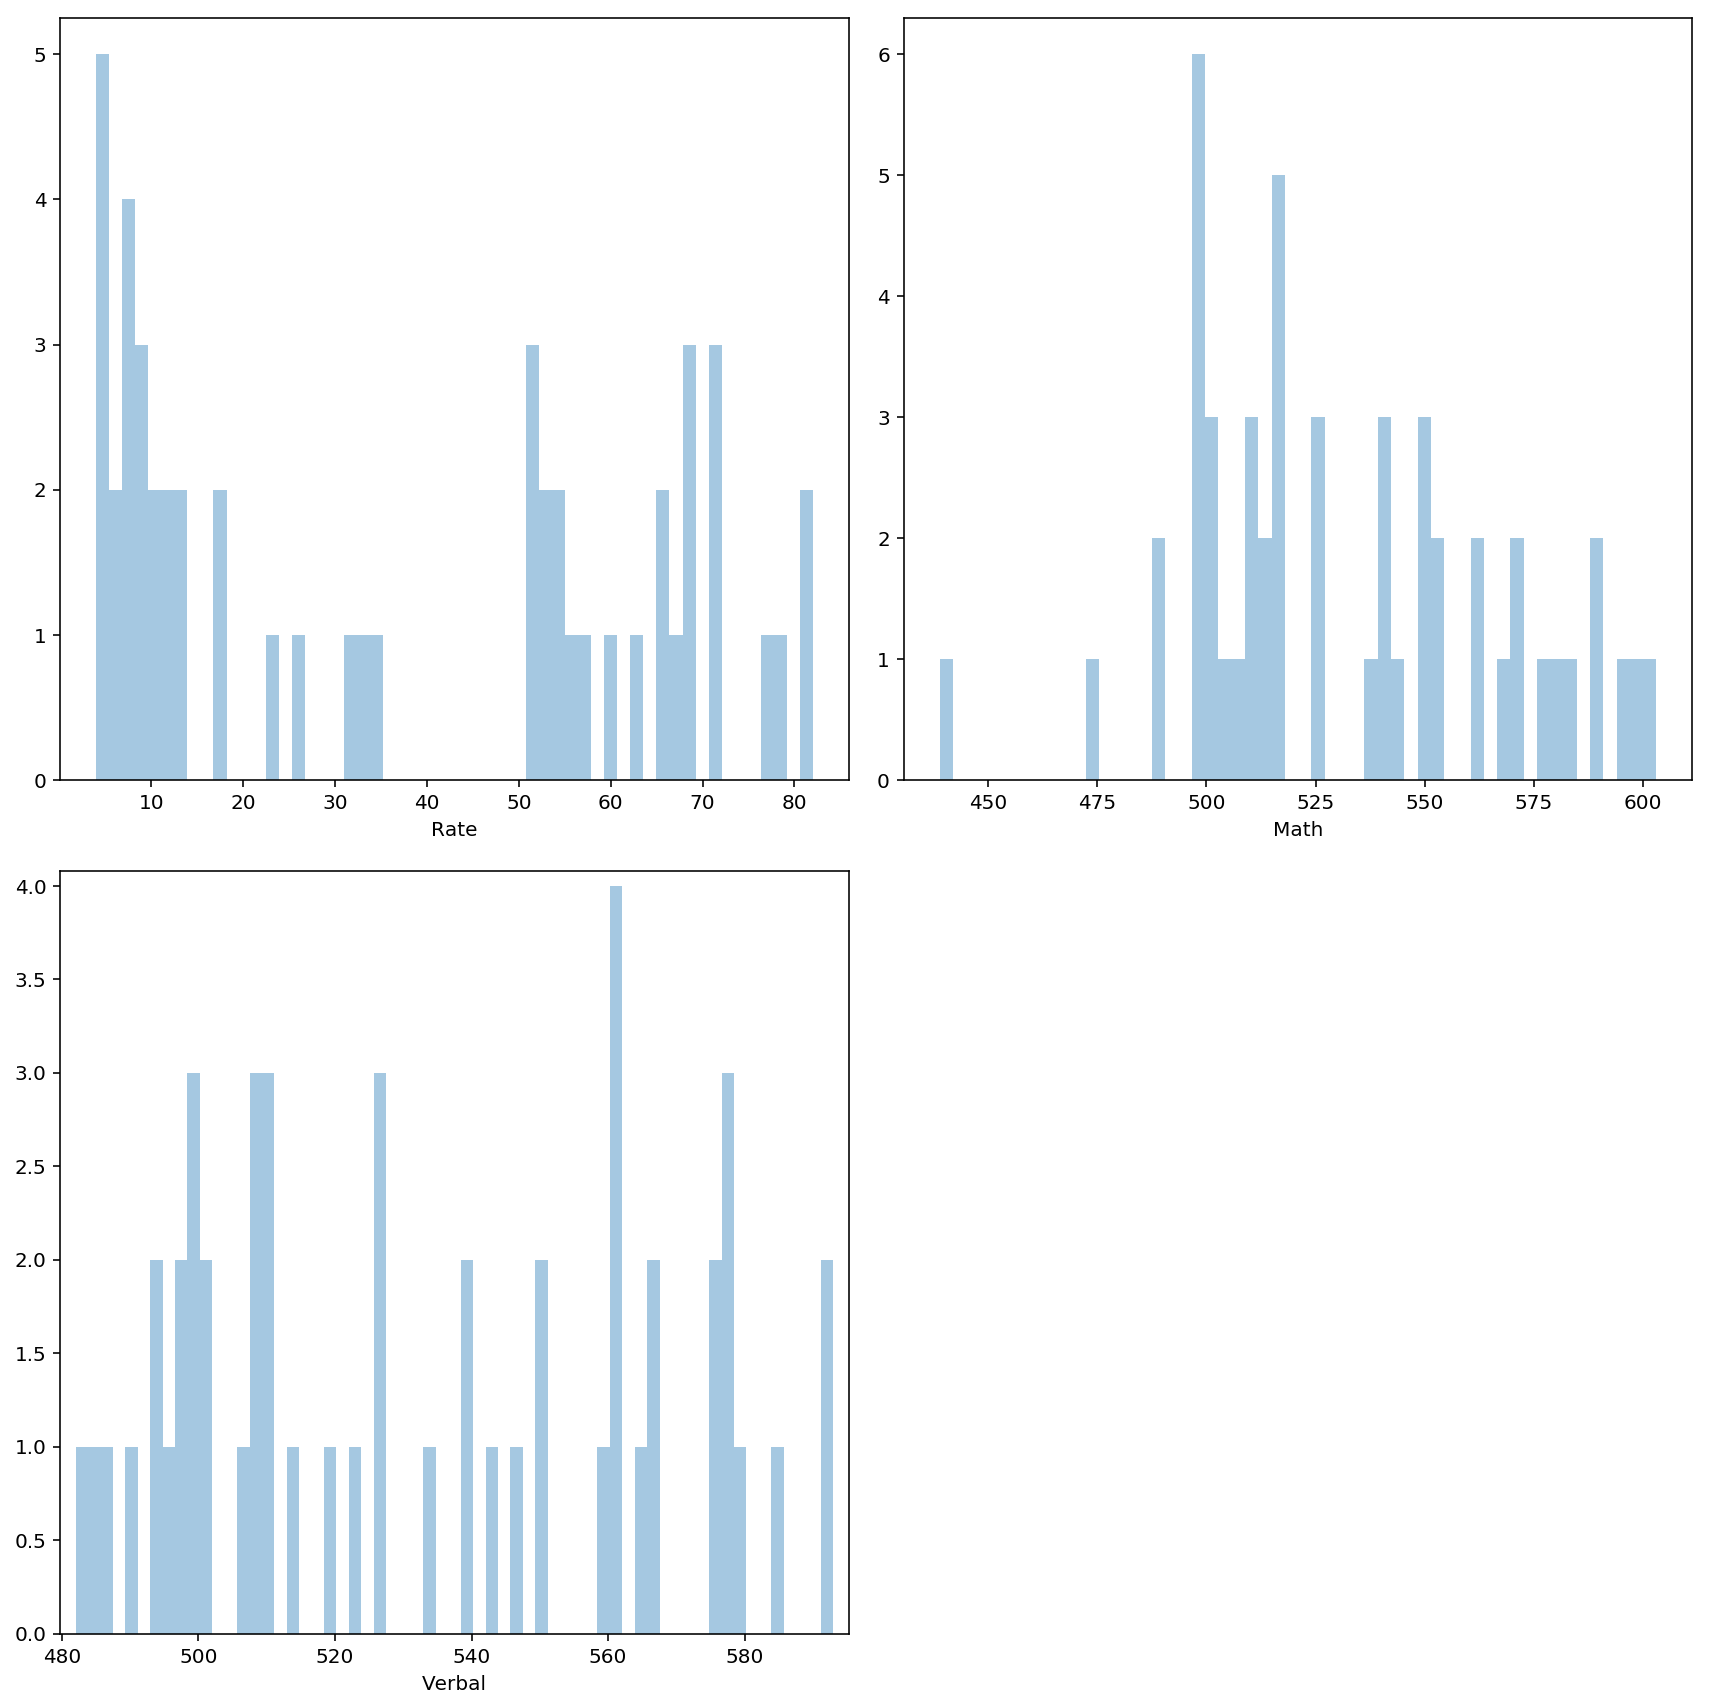

   State  Rate  Verbal  Math
46    UT     5     575   570
47    IA     5     593   603
48    SD     4     577   582
49    ND     4     592   599
50    MS     4     566   551


In [6]:
# Drop the last observation row since it represents the US aggregate ('all') 'Rate' and the respective scores
sat_score_df = sat_score_df.iloc[:-1, :]

import matplotlib.pyplot as plt
import seaborn as sns
fig, ax = plt.subplots(figsize=(12,12))

# Create subplots of 'Rate', 'Math and 'Verbal'
for plot_i, var in enumerate(['Rate', 'Math', 'Verbal']):
    
    # Create bin rule: Freedman–Diaconis
    bin_num = int(sat_score_df[var].quantile(0.75) - sat_score_df[var].quantile(0.25) / sat_score_df.shape[0]**(1/3))
    
    # Create 2x2 dimension subplot, each iteration activates and plots the prevailing feature
    plt.subplot(2, 2, plot_i+1)
    _ = sns.distplot(sat_score_df[var], kde=False, bins=bin_num)

# Optimise visualisations
plt.margins(0.02); plt.tight_layout(); plt.show()

print sat_score_df.tail()

### 3.2 Using seaborn's `pairplot`, show the joint distributions for each of `Rate`, `Math`, and `Verbal`

Explain what the visualization tells you about your data.

[Please read over the `pairplot` documentation to fine-tune your chart.](https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.pairplot.html#seaborn.pairplot)

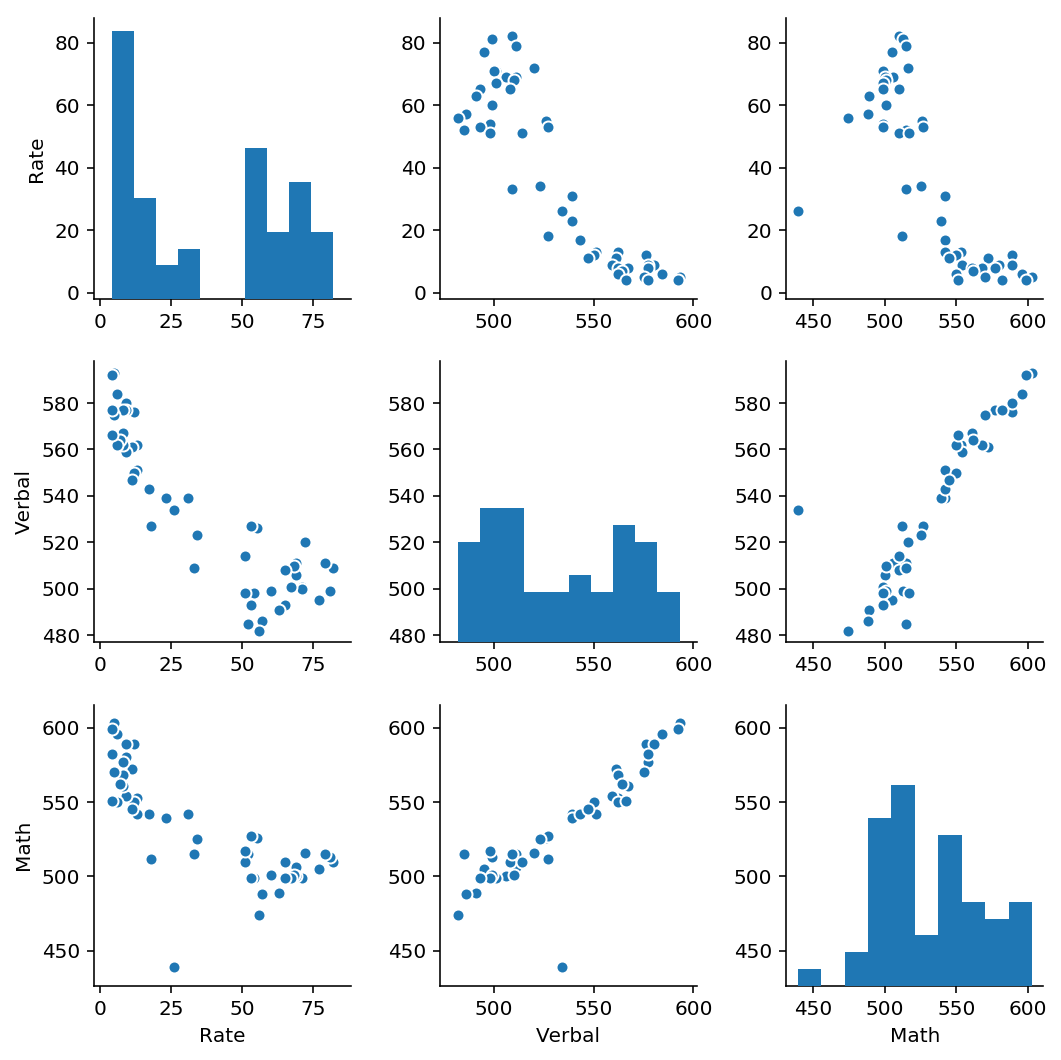

In [7]:
# Non-numeric columns will not be plotted
_ = sns.pairplot(sat_score_df)
plt.tight_layout(); plt.margins(0.02); plt.show()

# Intuitively, a positive correlation between 'Math' and 'Verbal' signals some form of performance consistency in the SAT
# candidates' ability whereby, suppose intelligence is reflected jointly in both 'Math' and 'Verbal' scores, then a person 
# doing well in 'Math' ought to perform well in 'Verbal' as well.

# For 'Rate', there is an inverse relation with 'Math' and 'Verbal' scores. Assuming that 'Rate' denotes the acceptance rate
# for SAT candidates between the 25th - 75th percentile, lower acceptance rates may be interpreted as more stringent 
# admissions criteria. That is, states in the US that have more prominent schools tend to enroll students from the 75th 
# percentile onwards.

# Thus, the lower the rate is for each 'State' the more stringent the admission scores are. Since higher scores would be 
# higher than the 75th percentile, they would not be recorded in 'Rate' and hence explains the inverse relationship where
# these schools tend not to accept people from this percentile range.

# One critical assumption is that schools with more stringent criteria accepts students above the 75th percentile, not 25th
# percentile and below.

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 4. Plot the data using built-in pandas functions.

---

Pandas is very powerful and contains a variety of nice, built-in plotting functions for your data. Read the documentation here to understand the capabilities:

http://pandas.pydata.org/pandas-docs/stable/visualization.html

### 4.1 Plot a stacked histogram with `Verbal` and `Math` using pandas

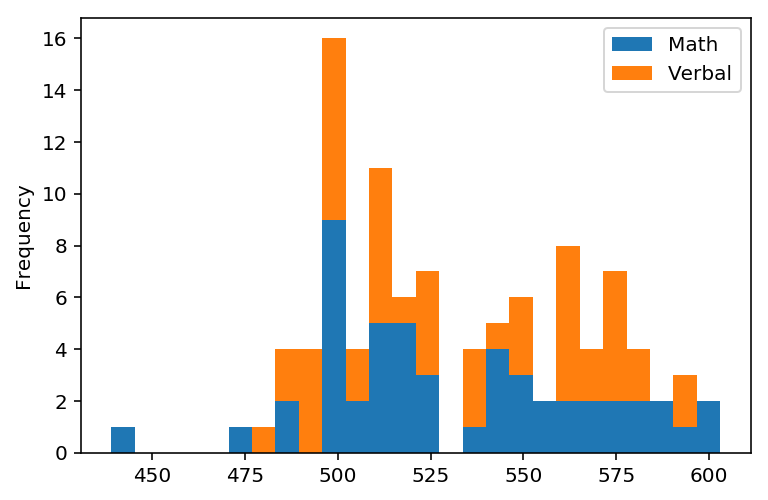

In [8]:
# Plotting a stacked histogram, 'stacked=True'
_ = sat_score_df[['Math', 'Verbal']].plot(kind='hist', stacked=True, bins=26)

### 4.2 Plot `Verbal` and `Math` on the same chart using boxplots

What are the benefits of using a boxplot as compared to a scatterplot or a histogram?

What's wrong with plotting a box-plot of `Rate` on the same chart as `Math` and `Verbal`?

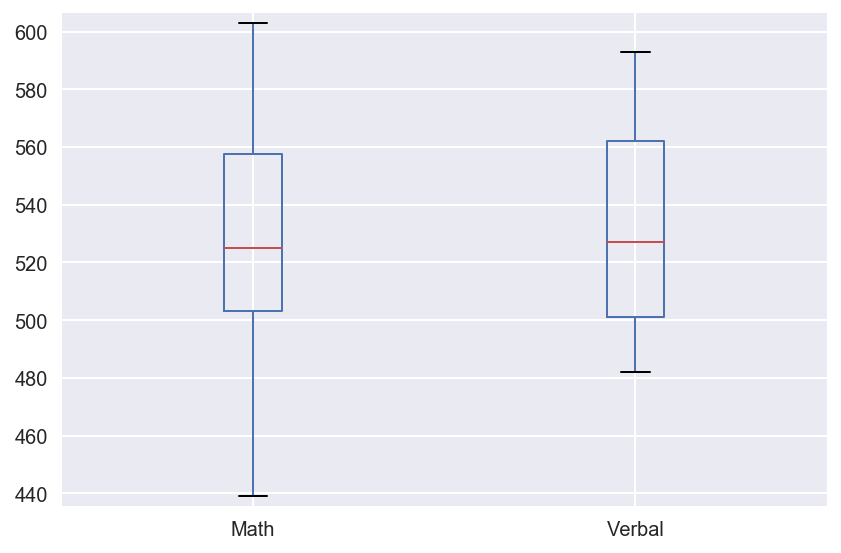

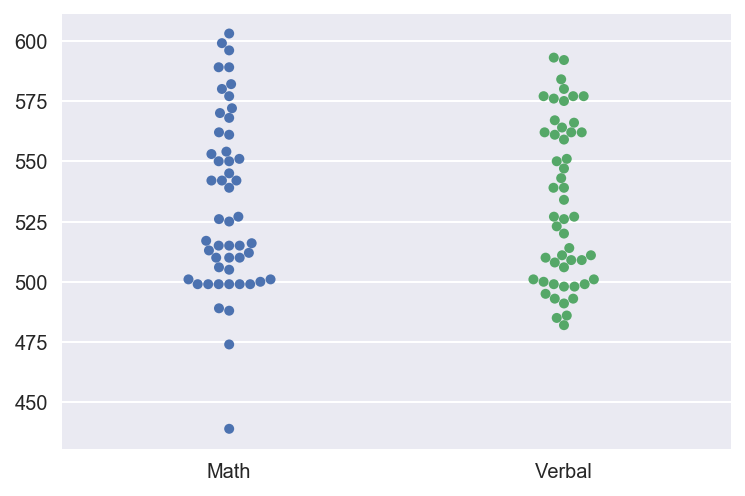

In [9]:
# Box-whisker plot of 'Math' and 'Verbal'
sns.set(); sat_score_df[['Math', 'Verbal']].boxplot()
plt.tight_layout(); plt.margins(0.02); plt.show()

### Part I, Benefits of boxplots:

# Boxplots are infomative in terms of the IQR which is not easily deduced from scatterplots.
# The max, min, median and the IQR are all summarised into one single plot

### Part II, Effects of plotting 'Rate' with 'Math' and 'Verbal'

# 'Rate' is in percentage terms with percentage values in the range of [0,100].
# Plotting it alongside the other 2 variables would result in a poor visualisation of all the variables, giving the
# impression that 'Rate' is clustered at the extreme lower end of the scale.

sns.swarmplot(data=sat_score_df[['Math','Verbal']]); plt.show()

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 4.3 Plot `Verbal`, `Math`, and `Rate` appropriately on the same boxplot chart

Think about how you might change the variables so that they would make sense on the same chart. Explain your rationale for the choices on the chart. You should strive to make the chart as intuitive as possible. 


  State  Rate  Verbal  Math  Std_Rate  Std_Verbal  Std_Math
0    CT    82     509   510  1.649606   -0.712322 -0.607938
1    NJ    81     499   513  1.612948   -1.015059 -0.524442
2    MA    79     511   515  1.539632   -0.651775 -0.468778
3    NY    77     495   505  1.466317   -1.136154 -0.747098
4    NH    72     520   516  1.283027   -0.379312 -0.440946 

Std_Rate:  Mean: 7.83686840912e-17 Stdev: 1.0 

Std_Verbal:  Mean: 9.31716577529e-16 Stdev: 1.0 

Std_Math:  Mean: -7.74979209346e-16 Stdev: 1.0 



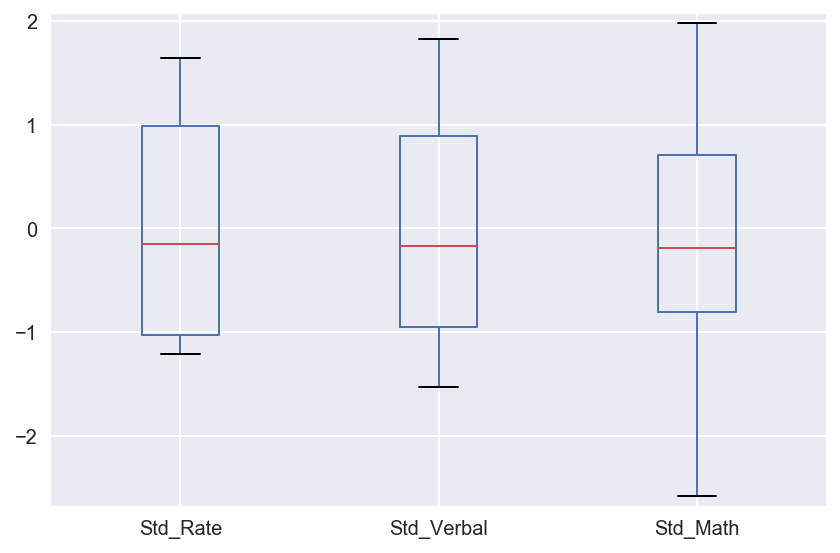

In [10]:
# We shall standardise the plots to approximate Z~(0,1) distributions such that the magnitudes of the features are scaled to
# the same measurement units for comparing each data feature's range, max, min and the IQRs
# The resultant chart informs viewers about the relative variability of all the variables with respect to each other

def gen_stdz(pdSeri):
    """ Generates a standardised random variable panda series"""
    return (pdSeri-np.mean(pdSeri)) / np.std(pdSeri)

# Create standardised columns
for series in ('Rate', 'Verbal', 'Math'):
    sat_score_df[str('Std_')+series] = gen_stdz(sat_score_df[series])

# Check if the standardisation has been succesfully implemented
print sat_score_df.head(5), '\n'

for series in ('Std_Rate', 'Std_Verbal', 'Std_Math'):
    print series+': ', 'Mean:', np.mean(sat_score_df[series]), 'Stdev:', np.std(sat_score_df[series]), '\n'
    
# Proceed to plot all the standardised variables onto a box-whisker plot
sns.set(); sat_score_df.boxplot(['Std_Rate', 'Std_Verbal', 'Std_Math'])
plt.margins(0.02); plt.tight_layout(); plt.show()

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 5. Create and examine subsets of the data

---

For these questions you will practice **masking** in pandas. Masking uses conditional statements to select portions of your DataFrame (through boolean operations under the hood.)

Remember the distinction between DataFrame indexing functions in pandas:

    .iloc[row, col] : row and column are specified by index, which are integers
    .loc[row, col]  : row and column are specified by string "labels" (boolean arrays are allowed; useful for rows)
    .ix[row, col]   : row and column indexers can be a mix of labels and integer indices
    
For detailed reference and tutorial make sure to read over the pandas documentation:

http://pandas.pydata.org/pandas-docs/stable/indexing.html



### 5.1 Find the list of states that have `Verbal` scores greater than the average of `Verbal` scores across states

How many states are above the mean? What does this tell you about the distribution of `Verbal` scores?




In [11]:
# Extract states that are above the nation-wide mean Verbal score
abv_avg_states = [states for states in 
                  sat_score_df[sat_score_df['Verbal'] > sat_score_df['Verbal'].mean()]['State']
                 ]
print abv_avg_states, '\n', 'No. of states above state average verbal scores:', len(abv_avg_states), 

# Check for unique values being returned
len(set(abv_avg_states)) == len(abv_avg_states)

# There are 51 states in the observation data with 24 states (less than 50% of all states) above the mean.
# This signals the possibility that the data may largely rest to the left of the distribution mean and
# is therefore unlikely to follow a normal distribution.

['CO', 'OH', 'MT', 'ID', 'TN', 'NM', 'IL', 'KY', 'WY', 'MI', 'MN', 'KS', 'AL', 'NE', 'OK', 'MO', 'LA', 'WI', 'AR', 'UT', 'IA', 'SD', 'ND', 'MS'] 
No. of states above state average verbal scores: 24

True

### 5.2 Find the list of states that have `Verbal` scores greater than the median of `Verbal` scores across states

How does this compare to the list of states greater than the mean of `Verbal` scores? Why?

In [12]:
# Extract states that are above the nation-wide mean Verbal score
abv_med_states = [states for states in 
                  sat_score_df[sat_score_df['Verbal'] > sat_score_df['Verbal'].median()]['State']
                 ]
print abv_med_states, '\n', 'No. of states above state median verbal scores:', len(abv_med_states)

# Check for unique values being returned
print len(set(abv_med_states)) == len(abv_med_states)

print 'Are the observations above the mean the same as the one in the median?', set(abv_med_states) == set(abv_avg_states)

# Compared to the number of states above the mean 'Verbal' scores, there is an identical number of states that lie above
# the state median 'Verbal' score. 

# Since there are 51 observations left (after removing the 'All' observation), the median score would be at the 26th value.
# To return 24 observations, this must imply that the 27th value shares the same value as the 26th.

# Since there are equal number of states above the mean and the median, this implies that the data is slightly skewed right
# although probably slightly-off symmetry. From the 'Verbal' histogram plotted earlier, the results here validates the shape
# of the plot.

['CO', 'OH', 'MT', 'ID', 'TN', 'NM', 'IL', 'KY', 'WY', 'MI', 'MN', 'KS', 'AL', 'NE', 'OK', 'MO', 'LA', 'WI', 'AR', 'UT', 'IA', 'SD', 'ND', 'MS'] 
No. of states above state median verbal scores: 24
True
Are the observations above the mean the same as the one in the median? True


In [13]:
# test = sat_score_df.sort_values(by='Verbal', ascending=True)
# test.reset_index()['Verbal']

### 5.3 Create a column that is the difference between the `Verbal` and `Math` scores

Specifically, this should be `Verbal - Math`.

In [14]:
# Using .sub()
sat_score_df['Verbal - Math'] = sat_score_df['Verbal'].sub(sat_score_df['Math'])

# Inspect the new column
print sat_score_df.head()

  State  Rate  Verbal  Math  Std_Rate  Std_Verbal  Std_Math  Verbal - Math
0    CT    82     509   510  1.649606   -0.712322 -0.607938             -1
1    NJ    81     499   513  1.612948   -1.015059 -0.524442            -14
2    MA    79     511   515  1.539632   -0.651775 -0.468778             -4
3    NY    77     495   505  1.466317   -1.136154 -0.747098            -10
4    NH    72     520   516  1.283027   -0.379312 -0.440946              4


### 5.4 Create two new DataFrames showing states with the greatest difference between scores

1. Your first DataFrame should be the 10 states with the greatest gap between `Verbal` and `Math` scores where `Verbal` is greater than `Math`. It should be sorted appropriately to show the ranking of states.
2. Your second DataFrame will be the inverse: states with the greatest gap between `Verbal` and `Math` such that `Math` is greater than `Verbal`. Again, this should be sorted appropriately to show rank.
3. Print the header of both variables, only showing the top 3 states in each.

In [15]:
# DataFrame 1
# Sort the dataframe by 'Verbal' > 'Math'; 'Verbal - Math' ought to be positive
verb_math_diff = sat_score_df.sort_values(by='Verbal - Math', ascending=False).iloc[:10, :]
print verb_math_diff.head(3)

# DataFrame 2
# Sort the dataframe by 'Math' > 'Verbal'; 'Verbal - Math' ought to be negative
math_verb_diff = sat_score_df.sort_values(by='Verbal - Math', ascending=True).iloc[:10, :]
print math_verb_diff.head(3)

   State  Rate  Verbal  Math  Std_Rate  Std_Verbal  Std_Math  Verbal - Math
27    OH    26     534   439 -0.403237    0.044520 -2.584010             95
50    MS     4     566   551 -1.209711    1.013278  0.533174             15
29    WV    18     527   512 -0.696500   -0.167396 -0.552274             15
   State  Rate  Verbal  Math  Std_Rate  Std_Verbal  Std_Math  Verbal - Math
21    HI    52     485   515  0.549869   -1.438891 -0.468778            -30
23    CA    51     498   517  0.513211   -1.045333 -0.413114            -19
1     NJ    81     499   513  1.612948   -1.015059 -0.524442            -14


## 6. Examine summary statistics

---

Checking the summary statistics for data is an essential step in the EDA process!

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 6.1 Create the correlation matrix of your variables (excluding `State`).

What does the correlation matrix tell you?


In [16]:
# Printing the correlation matrix
sat_score_df.loc[:, ['Rate', 'Verbal', 'Math', 'Verbal - Math']].corr()

# We observe that 'Rate' is inversely proportional to 'Verbal' and 'Math', which are both directly proportional to each
# other. For every 1% increment in 'Rate', 'Verbal' and 'Math' scores decrease approximately by 0.888 and 0.773 SAT scores
# respectively. This would mean that schools with more relaxed admissions criteria accept lower-scored candidates

# 'Rate' is also inversely proportional to 'Verbal - Math' although the relation is relatively weak in linear terms.
# 'Verbal' is weakly correlated with 'Verbal - Math' compared to 'Math' with correlation values 0.0445 and -0.388 
# respectively. 

# This suggests that 'Verbal - Math' is more sensitive to changes in 'Math' compared to 'Verbal' in linear terms

,Rate,Verbal,Math,Verbal - Math
Rate,1.000000,-0.888121,-0.773419,-0.098671
Verbal,-0.888121,1.000000,0.899909,0.044527
Math,-0.773419,0.899909,1.000000,-0.395574
Verbal - Math,-0.098671,0.044527,-0.395574,1.000000


<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 6.2 Use pandas'  `.describe()` built-in function on your DataFrame

Write up what each of the rows returned by the function indicate.

In [17]:
# Printing the description of the DataFrame
sat_score_df.describe()

# Count: Number of non-null observations detected for computation of statistics
# Mean: The average, sum of all observations' values divided by the number of observations
# Std: The average deviation magnitude of the observations' values from the mean
# Min: Lowest value observed in the series
# 25%: 25th percentile of the CDF of the series
# 50%: Median of the series
# 75%: 75th percentile of the CDF of the series
# Max: Highest value observed in the series

,Rate,Verbal,Math,Std_Rate,Std_Verbal,Std_Math,Verbal - Math
count,51.000000,51.000000,51.000000,5.100000e+01,5.100000e+01,5.100000e+01,51.000000
mean,37.000000,532.529412,531.843137,7.836868e-17,9.317166e-16,-7.749792e-16,0.686275
std,27.550681,33.360667,36.287393,1.009950e+00,1.009950e+00,1.009950e+00,15.839811
min,4.000000,482.000000,439.000000,-1.209711e+00,-1.529712e+00,-2.584010e+00,-30.000000
25%,9.000000,501.000000,503.000000,-1.026422e+00,-9.545116e-01,-8.027620e-01,-6.000000
50%,33.000000,527.000000,525.000000,-1.466317e-01,-1.673957e-01,-1.904582e-01,0.000000
75%,64.000000,562.000000,557.500000,9.897637e-01,8.921834e-01,7.140816e-01,4.500000
max,82.000000,593.000000,603.000000,1.649606e+00,1.830668e+00,1.980437e+00,95.000000


<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 6.3 Assign and print the _covariance_ matrix for the dataset

1. Describe how the covariance matrix is different from the correlation matrix.
2. What is the process to convert the covariance into the correlation?
3. Why is the correlation matrix preferred to the covariance matrix for examining relationships in your data?

In [18]:
# Printing the covariance-matrix of ['Rate', 'Verbal', 'Math', 'Verbal - Math']
sat_cov = sat_score_df.loc[:, ['Rate', 'Verbal', 'Math', 'Verbal - Math']].cov()
print sat_cov

# The correlation matrix is the ratio of two variables' joint variability in relation to each other as a proportion to their 
# own variation which thus falls within the range [-1, 1]. Compared to the covariance matrix, it measures the co-variation 
# (or variance for the diagonals of the covariance matrix) in their native magnitude units and are thus in non-ratio scalar 
# terms. Hence the values appear larger.

# To convert covariance for some two variables:
# For some 2 random variables (X,Y), the correlation is given as,
#     CORR(X,Y) = COV(X,Y)/sd(X)sd(Y)
    
# Correlation is more insightful as it scales the unit change interpretation into ratios such as, by how much units of X
# changes for every 1 unit change in Y linearly.

                 Rate       Verbal         Math  Verbal - Math
Rate           759.04  -816.280000  -773.220000     -43.060000
Verbal        -816.28  1112.934118  1089.404706      23.529412
Math          -773.22  1089.404706  1316.774902    -227.370196
Verbal - Math  -43.06    23.529412  -227.370196     250.899608


<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 7. Performing EDA on "drug use by age" data.

---

You will now switch datasets to one with many more variables. This section of the project is more open-ended - use the techniques you practiced above!

We'll work with the "drug-use-by-age.csv" data, sourced from and described here: https://github.com/fivethirtyeight/data/tree/master/drug-use-by-age.

### 7.1

Load the data using pandas. Does this data require cleaning? Are variables missing? How will this affect your approach to EDA on the data?

In [19]:
drugs = pd.read_csv('drug-use-by-age.csv')

# Checking for null values and dtypes
print drugs.info()
# We observe that 'age', 'cocaine-frequency', 'crack-frequency', 'heroin-frequency', 'inhalant-frequency', 
# 'oxycontin-frequency' and 'meth-frequency' are dtype=object where we expect them to be float64.

# Inspect the typical value in each column by df.head() & df.tail()
print drugs.head(), drugs.tail()
# We observe that 'age' appears to be categorical as it seemed to be in running order until towards the end was grouped by 
# age-span. For the remaining variables, we see that '-' values occupy certain portions of these columns which would explain
# why these columns are of dtype=object. To verify, we can invoke the '.unique()' method to check for such values.

# Inspect unique values to validate only '-' exists
freq_to_replace = ['age', 'cocaine-frequency', 'crack-frequency',
                   'heroin-frequency', 'inhalant-frequency', 'oxycontin-frequency','meth-frequency']

for feat in freq_to_replace:
    print pd.unique(drugs[feat])
# While there are no missing values, there are odd entries that result in numeric columns to be detected as objects. 
# Aside from 'age', features with '-' values are equivalently '0' since they measure frequency. Hence we shall replace these
# values as '0's.

# Replace '-' as '0's before recasting the relevant series into dtype=float
for feat in freq_to_replace[1:]:
    drugs.loc[drugs[feat]=='-', feat] = 0
    drugs[feat] = drugs[feat].map(lambda x: float(x))
print drugs.info()

# Impacts of '-' values: During the EDA process, observation rows with these values will be implicitly truncated, 
# leaving us with fewer data points to compute the statistics. Consequently, the computed statistics may not be a good 
# representative sample of the population.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 28 columns):
age                        17 non-null object
n                          17 non-null int64
alcohol-use                17 non-null float64
alcohol-frequency          17 non-null float64
marijuana-use              17 non-null float64
marijuana-frequency        17 non-null float64
cocaine-use                17 non-null float64
cocaine-frequency          17 non-null object
crack-use                  17 non-null float64
crack-frequency            17 non-null object
heroin-use                 17 non-null float64
heroin-frequency           17 non-null object
hallucinogen-use           17 non-null float64
hallucinogen-frequency     17 non-null float64
inhalant-use               17 non-null float64
inhalant-frequency         17 non-null object
pain-releiver-use          17 non-null float64
pain-releiver-frequency    17 non-null float64
oxycontin-use              17 non-null float64
oxycontin-f

### 7.2 Do a high-level, initial overview of the data

Get a feel for what this dataset is all about.

Use whichever techniques you'd like, including those from the SAT dataset EDA. The final response to this question should be a written description of what you infer about the dataset.

Some things to consider doing:

- Look for relationships between variables and subsets of those variables' values
- Derive new features from the ones available to help your analysis
- Visualize everything!

                                n  alcohol-use  alcohol-frequency  \
n                        1.000000     0.310512           0.313431   
alcohol-use              0.310512     1.000000           0.897889   
alcohol-frequency        0.313431     0.897889           1.000000   
marijuana-use           -0.169007     0.594165           0.260219   
marijuana-frequency      0.135597     0.920425           0.818769   
cocaine-use             -0.021565     0.773458           0.577601   
cocaine-frequency        0.388318     0.260301           0.317172   
crack-use                0.281797     0.877378           0.785050   
crack-frequency          0.574629     0.337802           0.364267   
heroin-use               0.007798     0.677614           0.546194   
heroin-frequency         0.617432     0.396779           0.432405   
hallucinogen-use        -0.295302     0.463702           0.182184   
hallucinogen-frequency   0.008743    -0.346643          -0.174622   
inhalant-use            -0.368395 

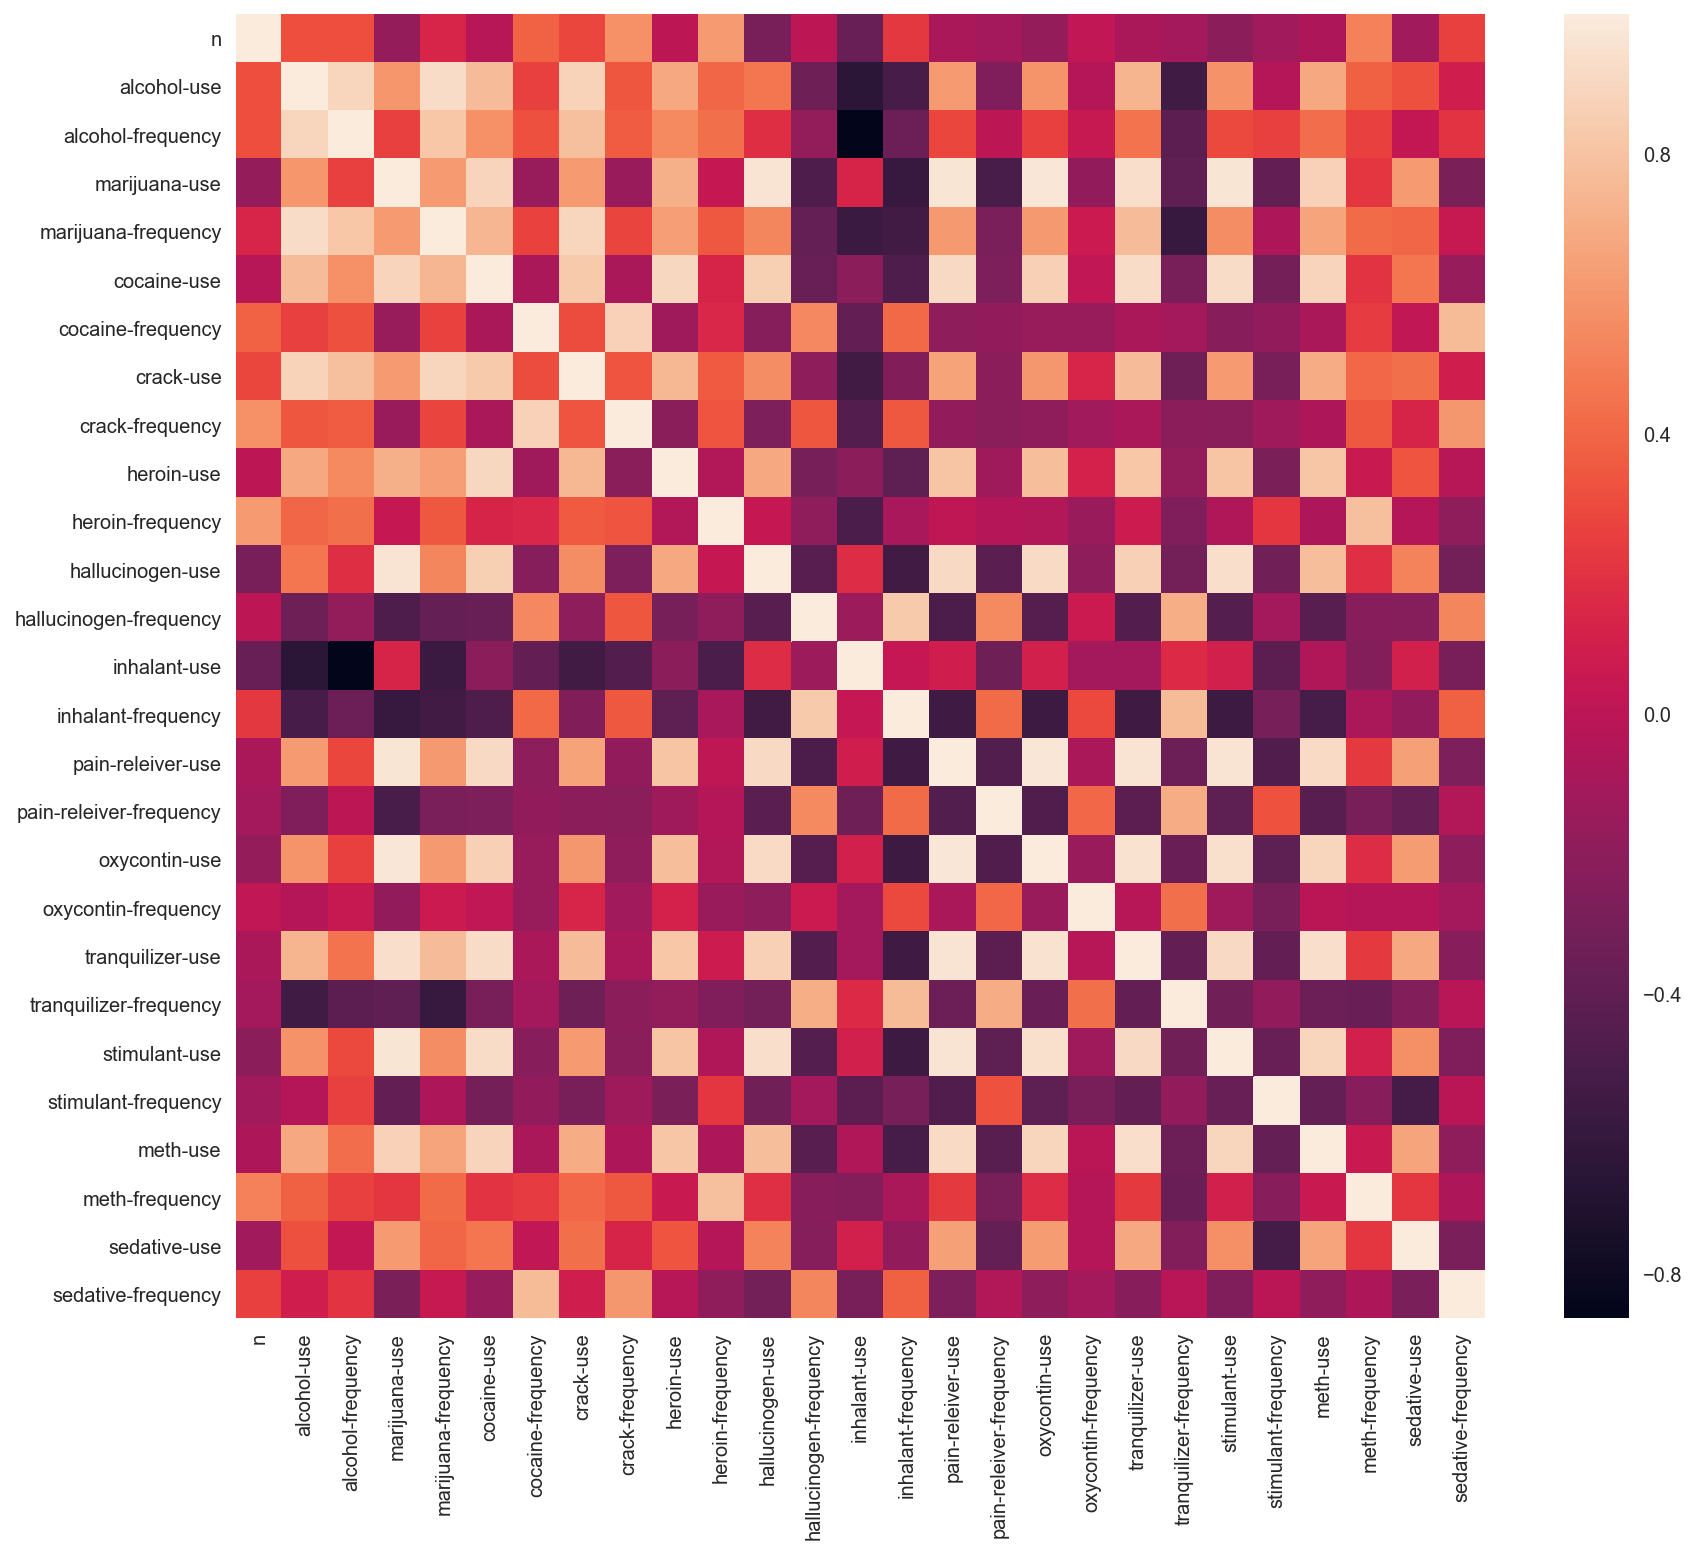

In [20]:
# Perform pair-wise correlation test
print drugs.iloc[:, 1:].corr()

# Visualise the data with heatmaps
fig = plt.figure(figsize=(14,12))
_ = sns.heatmap(drugs.iloc[:, 1:].corr()); plt.show()

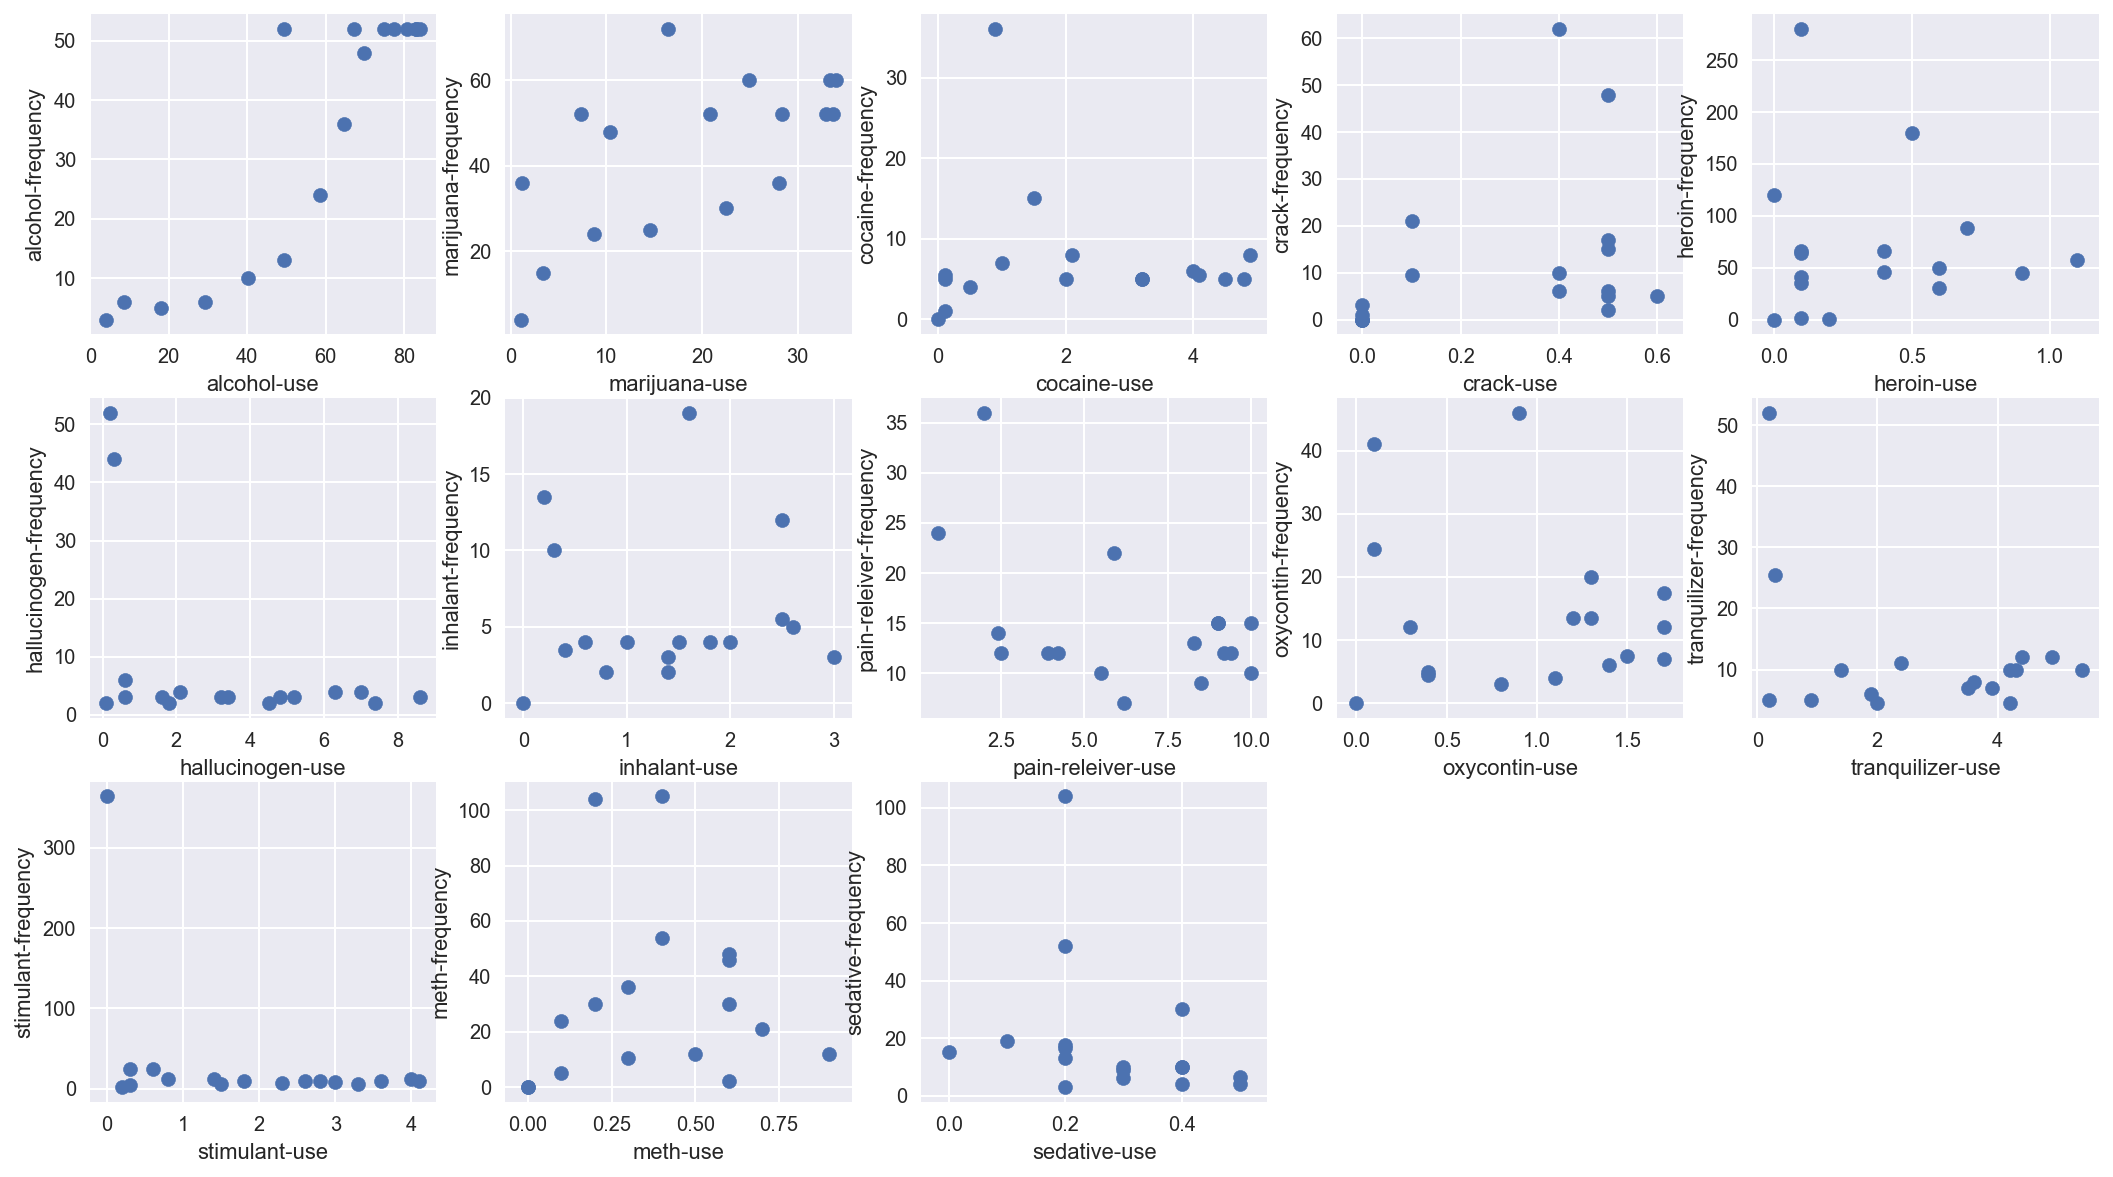

In [21]:
# Plot scatter relations between drug-use and frequency
plt.clf()

# Extract column names for labelling
fig = plt.figure(figsize=(18,10))
drug_cols = list(drugs.columns)
for plot in range(1, 14):
    _ = plt.subplot(3, 5, plot)
    _ = plt.scatter(x=drugs.iloc[:, 2*plot], y=drugs.iloc[:, 2*plot+1])
    _ = plt.xlabel(drug_cols[2*plot]) ; _ = plt.ylabel(drug_cols[2*plot+1]) 
plt.show()

In [22]:
# Limits of the data; for some 'use' column, its corresponding 'frequency' is non-zero eventhough 'use' itself is recorded
# zero. One possibility may be due to rounding errors such that values less than 0.05 are rounded down.

# We shall replace these values with 0.0499 such that rounding this value is equivalently 0.0
for col in range(2, 27, 2):
    for row in range(len(drugs['alcohol-use'])):
        if (drugs.iloc[row, col] == 0.0) and (drugs.iloc[row, col+1] > 0.0):
            drugs.iloc[row, col] = 0.0499
            
drugs.head(17)

# Inspect 'dtype' and descriptive statistics
print drugs.loc[:, :'heroin-use'].describe()
print drugs.loc[:, 'heroin-use':].describe()

# There appears to be no odds max, min values where frequency range [0,365] and usage [0, 100]

                 n  alcohol-use  alcohol-frequency  marijuana-use  \
count    17.000000    17.000000          17.000000      17.000000   
mean   3251.058824    55.429412          33.352941      18.923529   
std    1297.890426    26.878866          21.318833      11.959752   
min    2223.000000     3.900000           3.000000       1.100000   
25%    2469.000000    40.100000          10.000000       8.700000   
50%    2798.000000    64.600000          48.000000      20.800000   
75%    3058.000000    77.500000          52.000000      28.400000   
max    7391.000000    84.200000          52.000000      34.000000   

       marijuana-frequency  cocaine-use  cocaine-frequency  crack-use  \
count            17.000000    17.000000          17.000000  17.000000   
mean             42.941176     2.176471           7.411765   0.299988   
std              18.362566     1.816772           8.014119   0.228460   
min               4.000000     0.000000           0.000000   0.000000   
25%          

In [23]:
# Create standardised columns
for series in drugs.iloc[:, 1:].columns:
    drugs[str('Std_')+series] = gen_stdz(drugs[series])

# Check if the standardisation has been succesfully implemented
for series in drugs.iloc[:, 29:].columns:
    print series+': ', 'Mean:', np.mean(drugs[series]), 'Stdev:', np.std(drugs[series]), '\n'

Std_alcohol-use:  Mean: 1.46941282671e-17 Stdev: 1.0 

Std_alcohol-frequency:  Mean: 7.83686840912e-17 Stdev: 1.0 

Std_marijuana-use:  Mean: 9.14301314397e-17 Stdev: 1.0 

Std_marijuana-frequency:  Mean: 1.92656348391e-16 Stdev: 1.0 

Std_cocaine-use:  Mean: 1.82860262879e-16 Stdev: 1.0 

Std_cocaine-frequency:  Mean: -8.48994077655e-17 Stdev: 1.0 

Std_crack-use:  Mean: -3.91843420456e-17 Stdev: 1.0 

Std_crack-frequency:  Mean: -1.11022302463e-16 Stdev: 1.0 

Std_heroin-use:  Mean: 1.89390986554e-16 Stdev: 1.0 

Std_heroin-frequency:  Mean: 6.53072367427e-18 Stdev: 1.0 

Std_hallucinogen-use:  Mean: 1.30614473485e-17 Stdev: 1.0 

Std_hallucinogen-frequency:  Mean: -3.59189802085e-17 Stdev: 1.0 

Std_inhalant-use:  Mean: 9.14301314397e-17 Stdev: 1.0 

Std_inhalant-frequency:  Mean: 7.83686840912e-17 Stdev: 1.0 

Std_pain-releiver-use:  Mean: -2.61228946971e-17 Stdev: 1.0 

Std_pain-releiver-frequency:  Mean: 9.14301314397e-17 Stdev: 1.0 

Std_oxycontin-use:  Mean: -1.30614473485e-17 

              Std_n  Std_alcohol-use  Std_alcohol-frequency  \
count  1.700000e+01     1.700000e+01           1.700000e+01   
mean   3.265362e-17     1.469413e-17           7.836868e-17   
std    1.030776e+00     1.030776e+00           1.030776e+00   
min   -8.164778e-01    -1.976099e+00          -1.467580e+00   
25%   -6.211062e-01    -5.878669e-01          -1.129127e+00   
50%   -3.598165e-01     3.516825e-01           7.081927e-01   
75%   -1.533261e-01     8.463840e-01           9.015948e-01   
max    3.287915e+00     1.103322e+00           9.015948e-01   

       Std_marijuana-use  Std_marijuana-frequency  Std_cocaine-use  \
count       1.700000e+01             1.700000e+01     1.700000e+01   
mean        9.143013e-17             1.926563e-16     1.828603e-16   
std         1.030776e+00             1.030776e+00     1.030776e+00   
min        -1.536158e+00            -2.185950e+00    -1.234857e+00   
25%        -8.811364e-01            -7.264486e-01    -9.511738e-01   
50%         

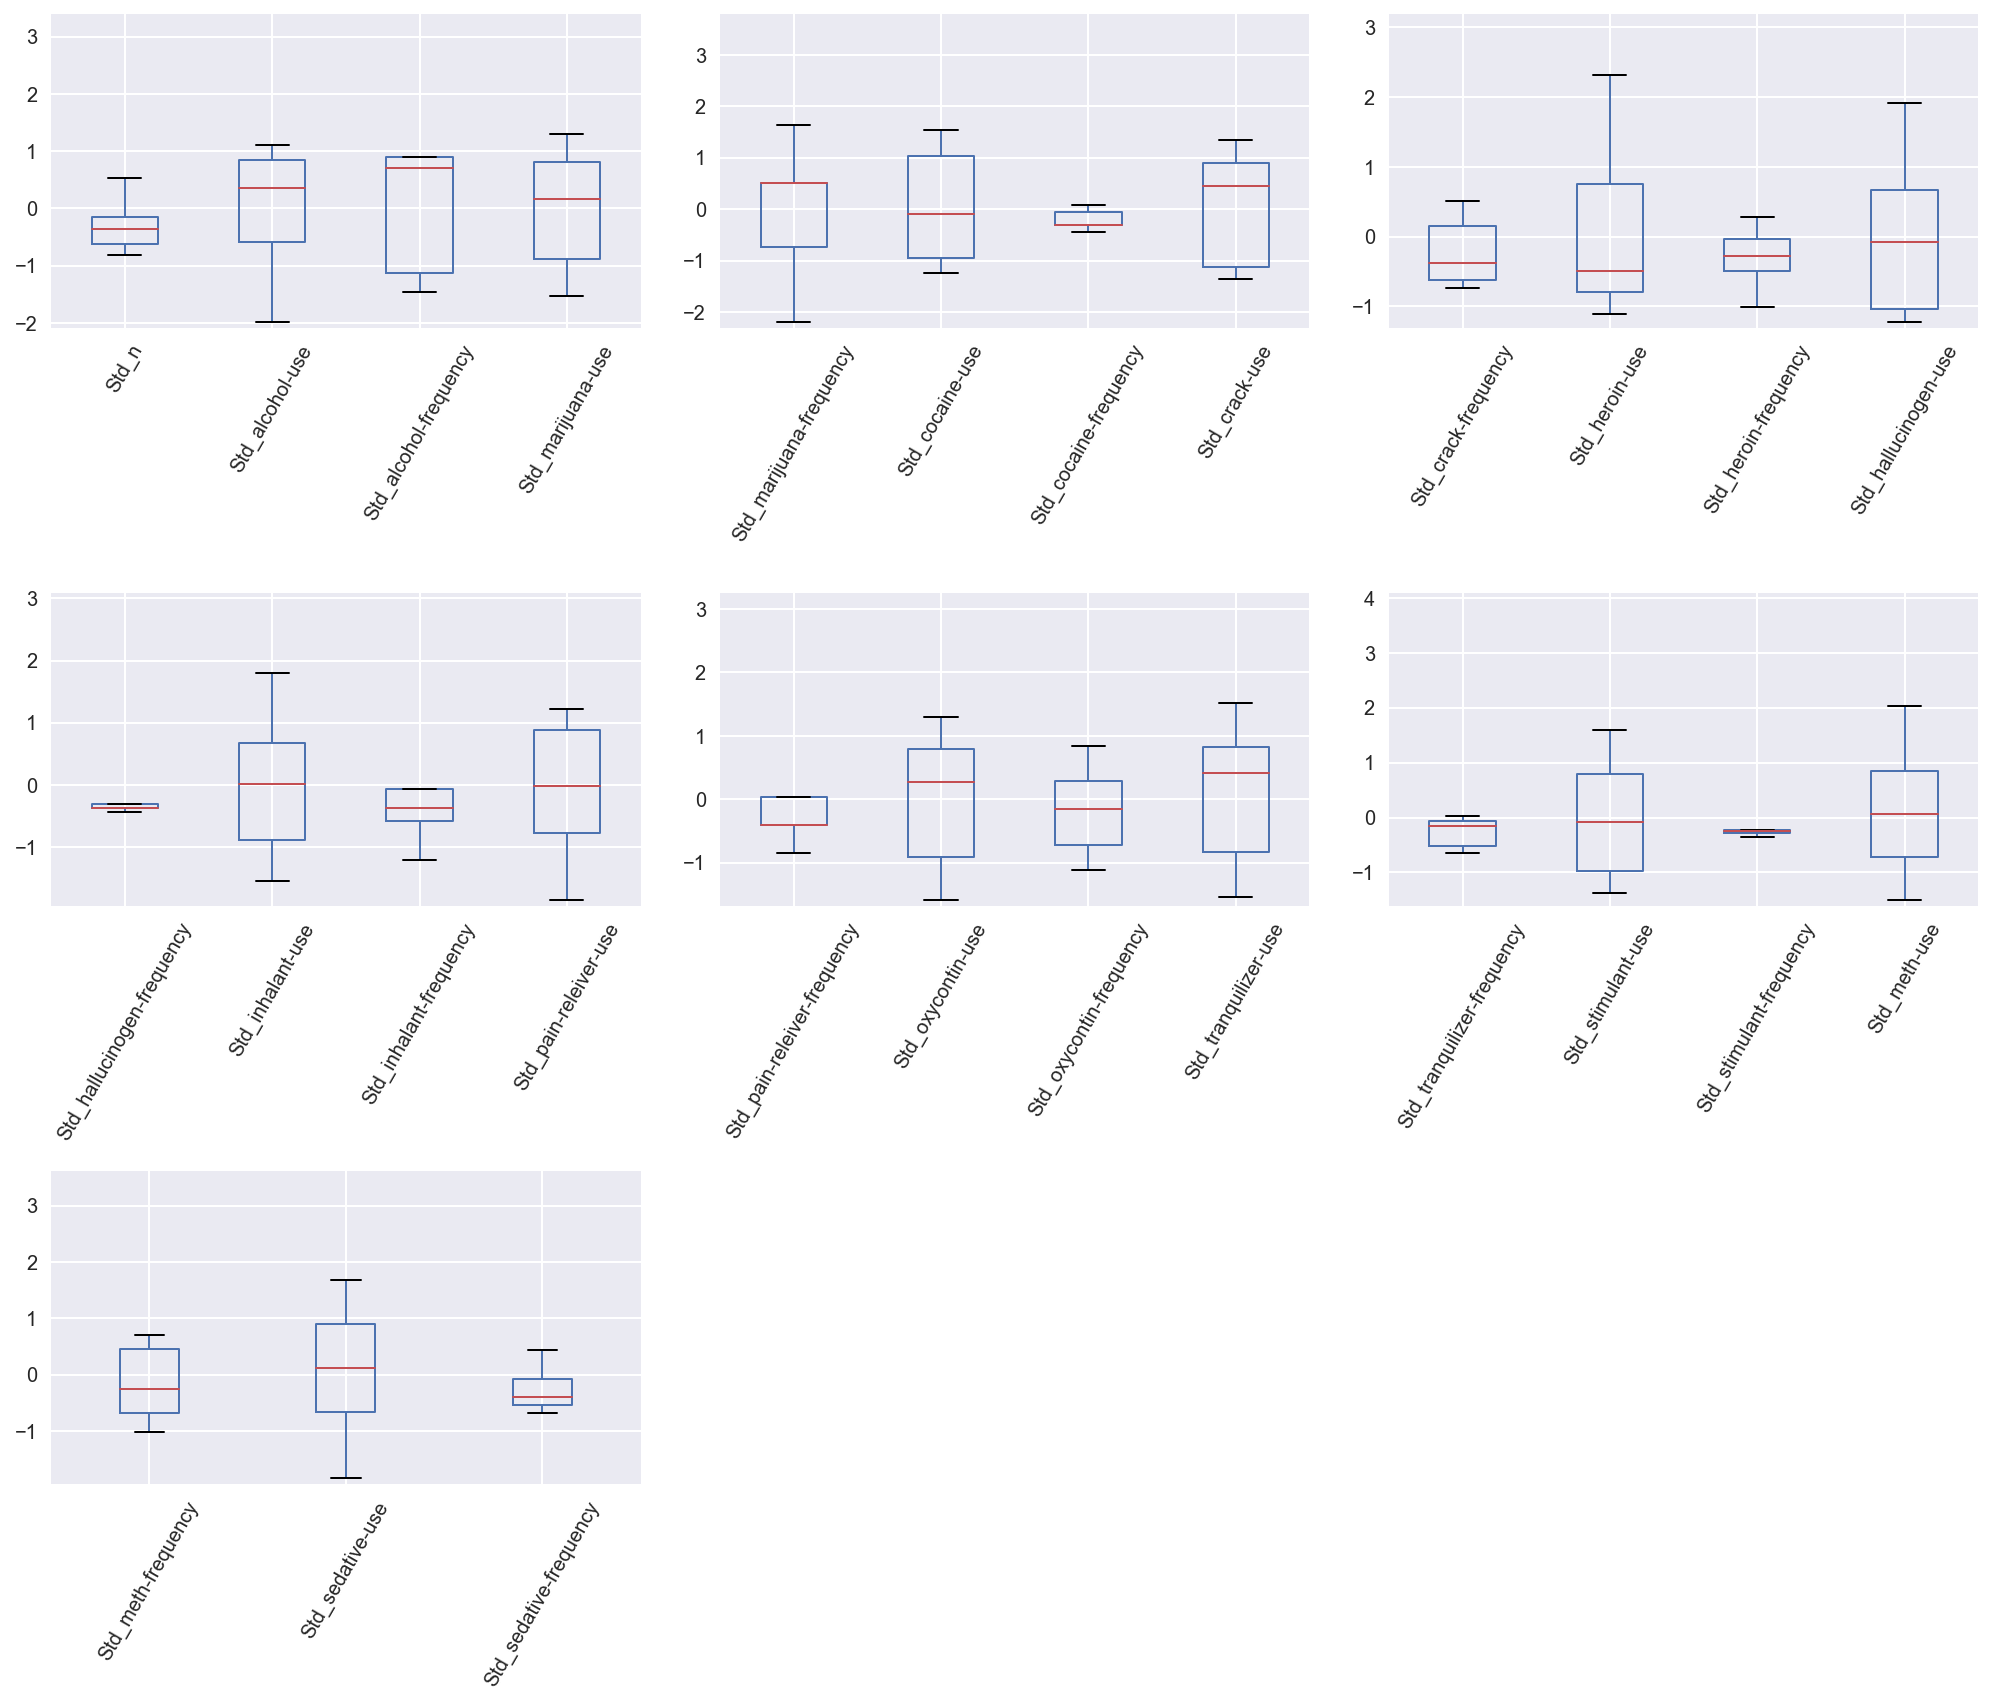

In [24]:
# Proceed to plot all the standardised variables onto a box-whisker plot (less 'age' as it is a categorical variable)
sns.set(); fig, ax = plt.subplots(figsize=(14,12))
limit = 4; start = 28

for plot_i in range(7):
    # When plotting the last batch of plots, we want to terminate the plotting loop 
    if start > 52:
        plt.subplot(3, 3, plot_i+1)
        _ = drugs.boxplot([var for var in drugs.iloc[:, start+limit:].columns])
        plt.xticks(rotation=60); plt.margins(0.02); plt.tight_layout()
    else:
        # Keep plotting in batches of 4 standardised features
        plt.subplot(3, 3, plot_i+1)
        _ = drugs.boxplot([var for var in drugs.iloc[:, start:start+limit].columns])
        plt.xticks(rotation=60); plt.margins(0.02); plt.tight_layout()
        
        # Iterate to plot the next 4 plots with new starting point
        start += limit
        
# Print out the descriptive statistics of these variables
print drugs.loc[:, 'Std_n':].describe()

### 7.3 Create a testable hypothesis about this data

Requirements for the question:

1. Write a specific question you would like to answer with the data (that can be accomplished with EDA).
2. Write a description of the "deliverables": what will you report after testing/examining your hypothesis?
3. Use EDA techniques of your choice, numeric and/or visual, to look into your question.
4. Write up your report on what you have found regarding the hypothesis about the data you came up with.


Your hypothesis could be on:

- Difference of group means
- Correlations between variables
- Anything else you think is interesting, testable, and meaningful!

**Important notes:**

You should be only doing EDA _relevant to your question_ here. It is easy to go down rabbit holes trying to look at every facet of your data, and so we want you to get in the practice of specifying a hypothesis you are interested in first and scoping your work to specifically answer that question.

Some of you may want to jump ahead to "modeling" data to answer your question. This is a topic addressed in the next project and **you should not do this for this project.** We specifically want you to not do modeling to emphasize the importance of performing EDA _before_ you jump to statistical analysis.

**##### Question and deliverables #####**

Earlier from the heatmap, it is observed that marijuana-use is highly positively correlated with the following variables:

1. hallucinogen-use | 2. pain-releiver-use | 3. oxycontin-use | 4. tranquilizer-use | 5. stimulant-use | 6. cocaine-use

`(spelling error pain-releiver was not corrected)`

We shall investigate the relationship between 'marijuana-use' and 'cocaine-use'. That is, is the mean of marijuana usage across all age groups specified, being the same as the mean of cocaine usage. And if so, can we see if 'marijuana-frequency' is a good representative of 'hallucinogen-frequency' just because 'marijuana-use' means are preliminarily similar to 'cocaine-use'.

`INTUITION:` If the average percentage usage of the 2 drugs across age groups are similar then perhaps their drug usage frequencies may be similar as well. Having marijuana addiction data would allow us to predict cocaine-abuse rates and its prevalence when for some reason we are unable to obtain data on it for other time periods (vice versa).

`AIM:` Investigate whether high correlation values between 2 variables equate to one of the variable capable of predicting the other

With that, we have 2 stages of hypothesis testing:

`STAGE 1`
- H0: mari_use_mu = coc_use_mu
- H1: mari_use_mu != coc_use_mu 

`STAGE 2`
- H0: mari_freq_mu = coc_freq_mu
- H1: mari_freq_mu != coc_freq_mu

`ASSUMPTIONS:` Based on the high correlations between 'marijuana-use' and 'cocaine-use', it is assumed that marijuana addiction effects are near identical to cocaine addiction effects. The results from these hypotheses would verify whether this assumption is reasonable or not.

                     marijuana-use  cocaine-use  marijuana-frequency  \
marijuana-use             1.000000     0.883789             0.615610   
cocaine-use               0.883789     1.000000             0.742598   
marijuana-frequency       0.615610     0.742598             1.000000   
cocaine-frequency        -0.154879    -0.077848             0.265193   

                     cocaine-frequency  
marijuana-use                -0.154879  
cocaine-use                  -0.077848  
marijuana-frequency           0.265193  
cocaine-frequency             1.000000  


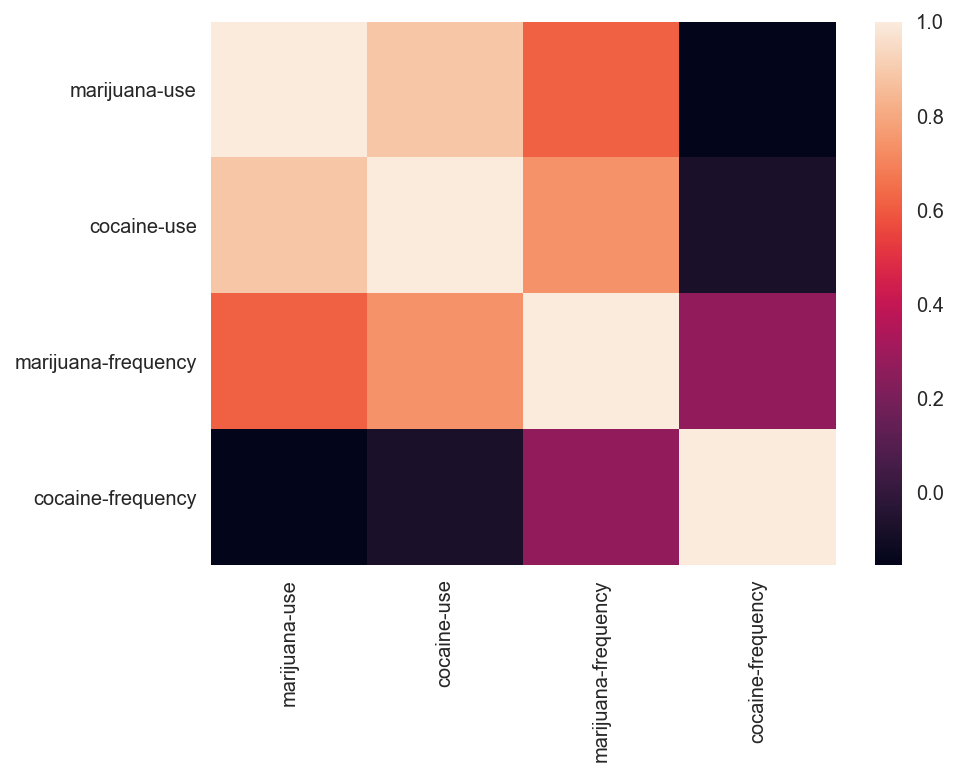

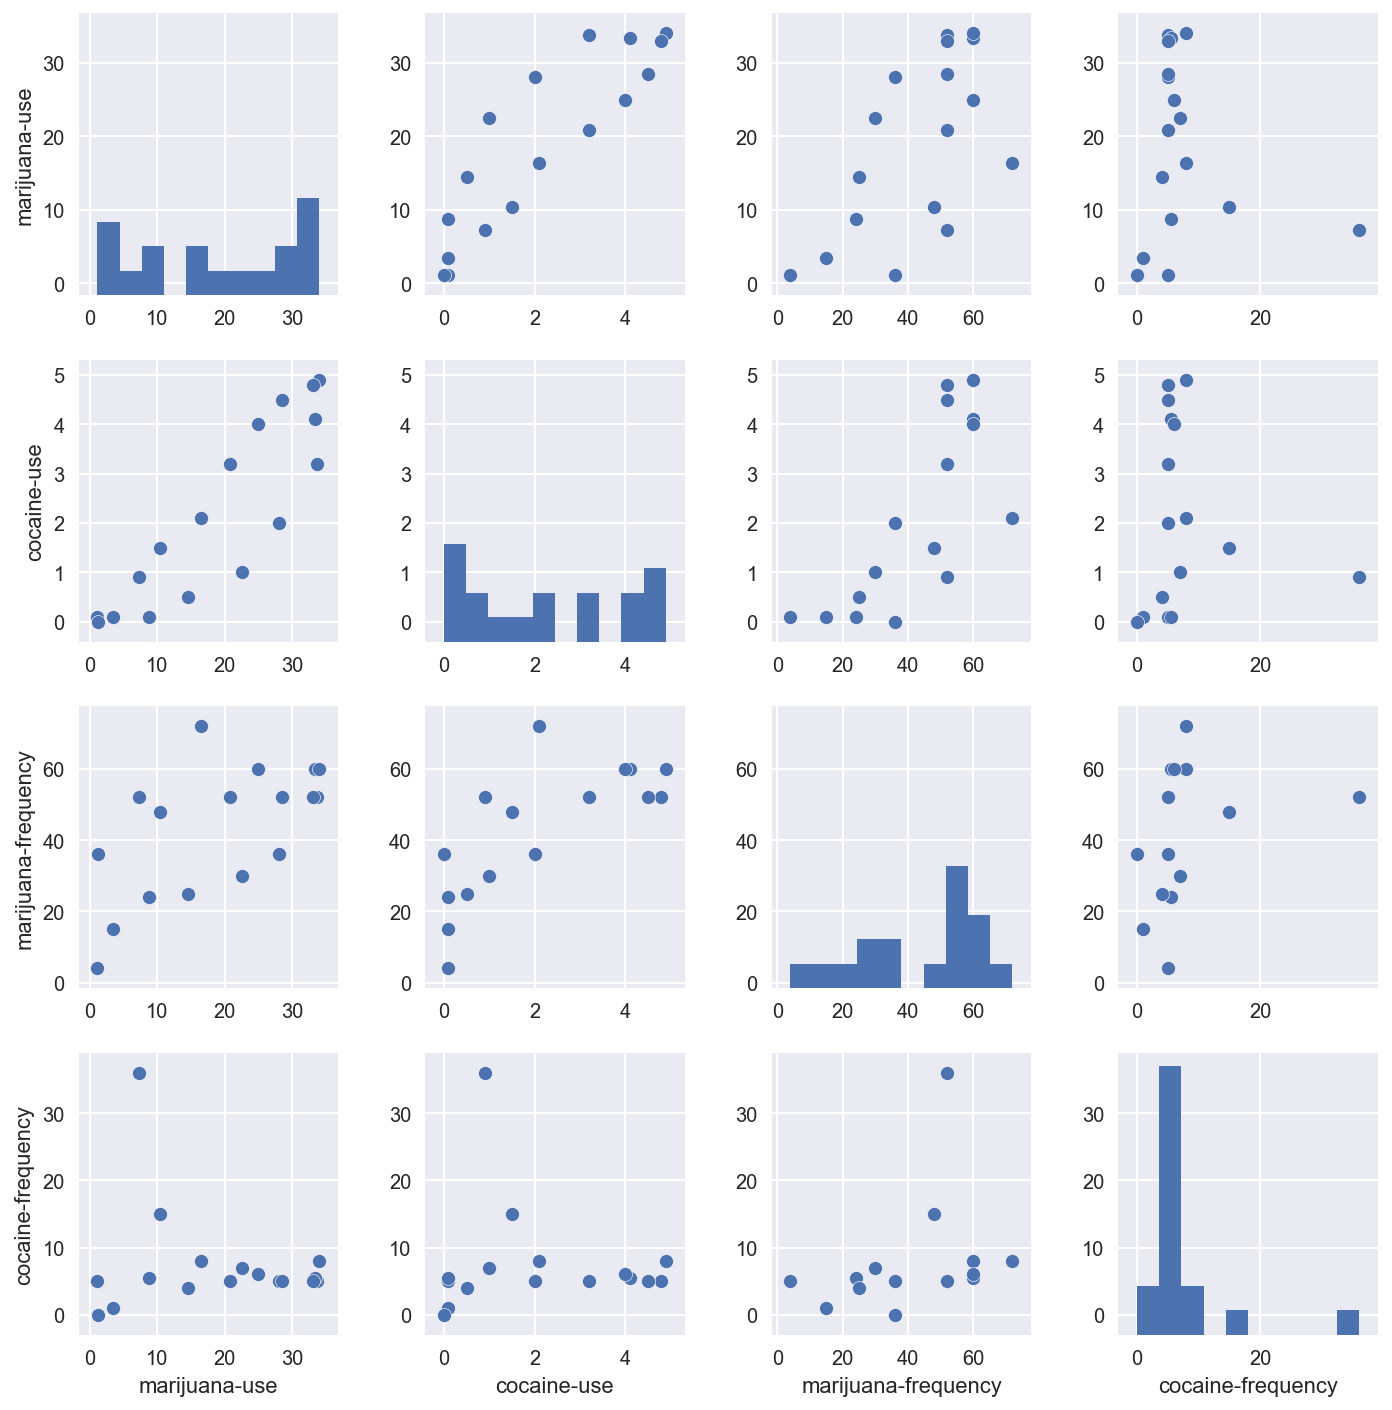

In [25]:
# Perform pair-wise correlation test
print drugs[['marijuana-use', 'cocaine-use', 'marijuana-frequency', 'cocaine-frequency']].corr()

# Visualise the data with heatmaps
fig, ax = plt.subplots(figsize=(7,5))
_ = sns.heatmap(drugs[['marijuana-use', 'cocaine-use', 'marijuana-frequency', 'cocaine-frequency']].corr())
_ = sns.pairplot(drugs[['marijuana-use', 'cocaine-use', 'marijuana-frequency', 'cocaine-frequency']])

plt.show()

In [26]:
# From the visual plots, we see that 'cocaine-frequency' is highly constant in relation to the other variables. Compared to
# 'marijuana-frequency' correlations, it has a relatively non-zero gradient relation to the other variables.

In [27]:
# Stage 1
from scipy import stats

# H0: mari_use_mu = coc_use_mu -> mari_use_mu - coc_use_mu = 0
# H1: mari_use_mu != coc_use_mu 

# Test at 5% Significance; degrees of freedom for 2-sample: n1+n2-2 = 32; crit_value at 0.975 = +/-2.037
alpha = 0.05

# Calculate the means of mari. and coc. (use)
mari_use_mu, coc_use_mu = np.mean(drugs['marijuana-use']), np.mean(drugs['cocaine-use'])

# Compute t-statistic
t_stat = (mari_use_mu - coc_use_mu)/(np.std(drugs['marijuana-use'], ddof=1)/len(drugs['marijuana-use'])**0.5)
    
# Compute p-values
p_value = stats.t.sf(np.abs(t_stat), len(drugs['marijuana-use']))*2

print 'marijuana-use mean:', mari_use_mu, '\n', \
'cocaine-use mean:', coc_use_mu, '\n',\
't-statistic:', t_stat, '\n', \
'p-value:', p_value

# We reject H0 in favour of H1 and conclude that 'mari_use_mu' is statistically different from 'coc_use_mu' at 5% 
# significance. Despite their high Pearson correlations, their means are statistically different from each other.

# This suggests that 'marijuana-frequency' may not predict 'cocaine-frequency' well since both have statistically different 
# mean percentage of drug-abusers (pick-up rate) across the age groups.

# Nonetheless, we would still like to investigate marijuana-frequency's capabilities on predicting cocaine-frequency.

marijuana-use mean: 18.9235294118 
cocaine-use mean: 2.17647058824 
t-statistic: 5.77352222095 
p-value: 2.2481069514e-05


In [28]:
# Stage 2

# H0: mari_use_sigma = coc_use_sigma
# H1: mari_use_sigma != coc_use_sigma

# Test at 5% Significance; degrees of freedom for 2-sample: n1+n2-2 = 32; crit_value at 0.975 = +/-2.037
alpha = 0.05

# Calculate the means of mari. and coc. (frequency)
mari_freq_mu, coc_freq_mu = np.mean(drugs['marijuana-frequency']), np.mean(drugs['cocaine-frequency'])

# Compute t-statistic
t_stat = (mari_freq_mu - coc_freq_mu)/(np.std(drugs['marijuana-frequency'], ddof=1)/len(drugs['marijuana-frequency'])**0.5)
    
# Compute p-values
p_value = stats.t.sf(np.abs(t_stat), len(drugs['marijuana-frequency']))*2

print 'marijuana-freq mean:', mari_freq_mu, '\n', \
'cocaine-freq mean:', coc_freq_mu, '\n',\
't-statistic:', t_stat, '\n', \
'p-value:', p_value

# We reject H0 in favour of H1 and conclude that 'mari_freq_mu' is statistically different from 'coc_freq_mu' at 5% level of
# significance. This affirms the deductions made in Stage 1 about the predictability of cocaine data using marijuana data.

# Therefore, we conclude that marijuana data may not be able to predict cocaine data well.

marijuana-freq mean: 42.9411764706 
cocaine-freq mean: 7.41176470588 
t-statistic: 7.97772593167 
p-value: 3.791077574e-07


###** Report **###

While marijuana pick-up rates (marijuana-use) across the age groups share a very high Pearson correlation to cocaine (cocaine-use), the hypotheses above provide evidences against using a highly correlated variable to predict its counterpart's mean.

This therefore demonstrates that Pearson rhos only explain linear relationships and is not an ideal benchmark to predict one variable's average using its counterpart which shares high/near perfect correlations with itself.

Pearson's rho may be useful in predicting how much 1 unit of change in X results in 'i' units change in Y but it would not be powerful enough to predict statistical parameters entirely.

### TLDR
For EDA purposes, looking at the means of 'marijuana-use' and 'cocaine-use', 18.92 and 2.18, and s.d. 11.96 and 1.82 respectively, they are clearly very different and therefore the hypothesis in Stage 1 is likely rejected even without conducting it.

Likewise, 'marijuana-frequency' and 'cocaine-frequency' are very different in their means as well with 42.94 and 7.411, and s.d. 18.36 and 8.01 respectively. Again as they look very different, the null hypothesis in Stage 2 is likely rejected too. Marijuana-abuse data is unlikely to predict the cocaine-abuse data well.

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 8. Introduction to dealing with outliers

---

Outliers are an interesting problem in statistics, in that there is not an agreed upon best way to define them. Subjectivity in selecting and analyzing data is a problem that will recur throughout the course.

1. Pull out the rate variable from the sat dataset.
2. Are there outliers in the dataset? Define, in words, how you _numerically define outliers._
3. Print out the outliers in the dataset.
4. Remove the outliers from the dataset.
5. Compare the mean, median, and standard deviation of the "cleaned" data without outliers to the original. What is different about them and why?

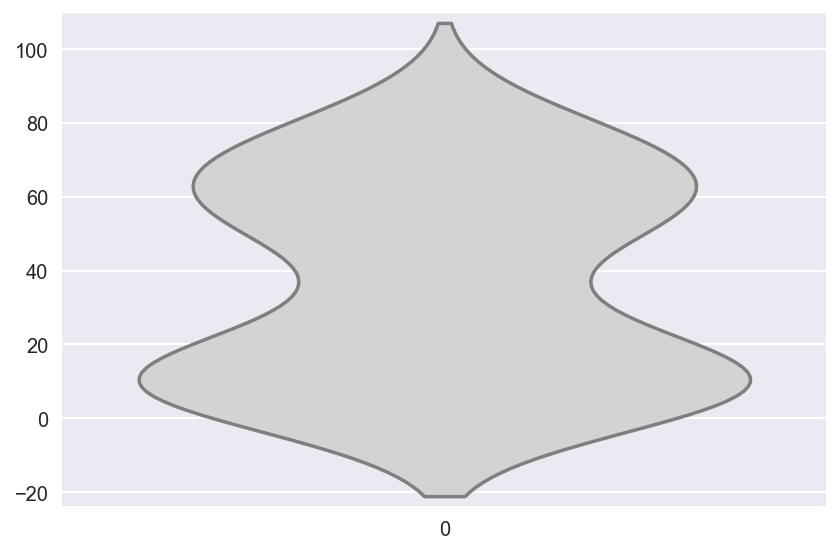

Mean: 37.0 S.d.: 27.2792386761
Empty DataFrame
Columns: [State, Rate, Verbal, Math, Std_Rate, Std_Verbal, Std_Math, Verbal - Math]
Index: []
Empty DataFrame
Columns: [State, Rate, Verbal, Math, Std_Rate, Std_Verbal, Std_Math, Verbal - Math]
Index: []


In [29]:
# From a violin plot, the data appears bimodal
_ = sns.violinplot(data=sat_score_df['Rate'], inner=None, color='lightgray')
plt.tight_layout(); plt.margins(0.02); plt.show()

# For more conservative checks: from the plots in Q3.1, we see that 'Rate' is roughly bimodal
# We shall define outliers as 3 sd first
    # although 99.7% of datapoints may not fall within this range since it is not normal

# Compute mean/sd of raw 'Rate' to determine if there are outliers in the dataset
raw_rate_sd = np.std(sat_score_df['Rate']); raw_rate_mean = np.mean(sat_score_df['Rate'])
print "Mean:", raw_rate_mean, 'S.d.:', raw_rate_sd

# LHS check
raw_rate_LHS_outliers = sat_score_df[sat_score_df['Rate'] < raw_rate_mean - 3*raw_rate_sd]
print raw_rate_LHS_outliers # We see that it returns nothing

# RHS check
raw_rate_RHS_outliers = sat_score_df[sat_score_df['Rate'] > raw_rate_mean + 3*raw_rate_sd]
print raw_rate_RHS_outliers # Again, we see that it returns nothing

In [30]:
# Checking for 1.5 IQR against 3sd of the data
qtile_25 = sat_score_df['Rate'].quantile(0.25)
qtile_75 = sat_score_df['Rate'].quantile(0.75)
iqr_1_5 = (qtile_75 - qtile_25)*1.5

lower_bound, upper_bound = qtile_25-iqr_1_5, qtile_75+iqr_1_5
print 'IQR Lower:', lower_bound, '\t', 'IQR Upper:', upper_bound

print '3sd below the mean:', raw_rate_mean-3*raw_rate_sd, '\t', '3sd above the mean:', raw_rate_mean+3*raw_rate_sd

# Since 1.5 IQR is higher than 3 sd of the data and there are no outliers found within 3 sd about the mean, we shall use 3 sd 
# as our benchmark for finding outliers

# While there are no outliers within +/-3sd of the sample, we want to obtain a reasonable estimate of "Rate's" mean value.
# By computing the mean from the sample means of 'Rate', we can almost be certain that the effects of outliers are negligible.

IQR Lower: -73.5 	IQR Upper: 146.5
3sd below the mean: -44.8377160282 	3sd above the mean: 118.837716028


In [31]:
# Setting randomisation seed for replicability
np.random.seed(12)

# Bootstrap replicates such that we can obtain a sample of the means of 'Rate'
def bs_rep_1d(data, func):
    """ Generate 1D-array of bootstrap replicates for computing a specific statistic
    I.e. Replicates of means, medians etc... 
    For building CI for hypothesis testing """
    return func(np.random.choice(data, size=len(data)))

def bs_reps(data, func, size=1):
    """ Generate bootstrap replicates """
    # Initialise empty array of replicates
    bs_repli = np.empty(size)
    # Generate replicates
    for i in range(size):
        bs_repli[i] = bs_rep_1d(data, func)
    return bs_repli

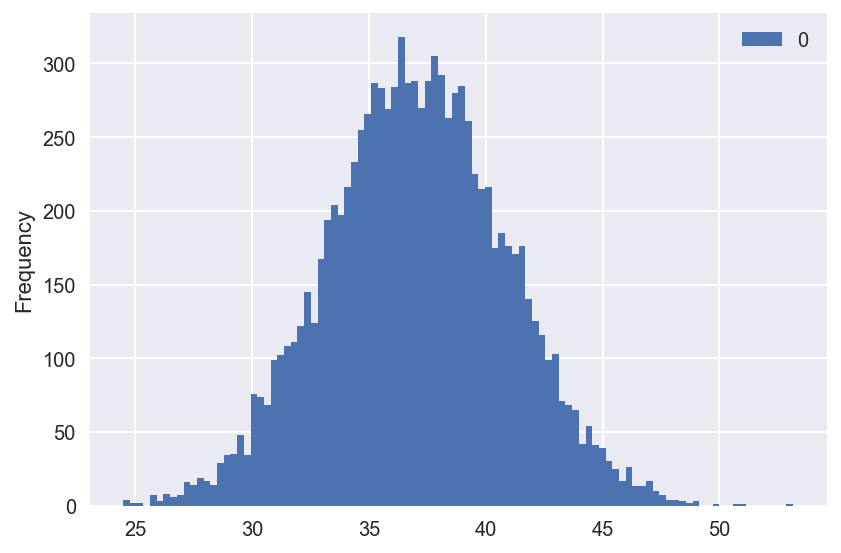

In [32]:
# Draw 10k samples: Bootstrapping may allow us to obtain a reasonable estimate of "Rate's" mean on average
bs_rate_mean = pd.DataFrame(bs_reps(sat_score_df['Rate'], np.mean, size=10000))

# Visualise with dist. plots and box-plots
bs_rate_mean.plot(kind='hist', bins=100);
plt.tight_layout(); plt.show()

In [33]:
# Obtain mu, sigma of the sample means
rate_mean_mu, rate_mean_se = np.mean(bs_rate_mean), np.std(bs_rate_mean, ddof=1)
print "Rate Sample Mean's mu:", rate_mean_mu, '\n', "Rate Sample Mean's se:", rate_mean_se, '\n'

# Perform Jarque-Bera Normality Test, 5% sig.
# If we fail to reject the null hypothesis, then we can assume the sample means follow close to a normal distribution
print stats.jarque_bera(bs_rate_mean)

# With p-value ~ 0.295, we fail to reject the null. Then with some assurance, it is 'safe' to take +/-3se as outliers since
# the bootstrap data is statistically indifferent to a normal distribution

# LHS check
rate_means_LHS_outliers = bs_rate_mean[bs_rate_mean < rate_mean_mu - 3*rate_mean_se]
print raw_rate_LHS_outliers # We see that it returns nothing

# RHS check
rate_means_RHS_outliers = bs_rate_mean[bs_rate_mean > rate_mean_mu + 3*rate_mean_se]
print raw_rate_RHS_outliers # Again, we see that it returns nothing

# Conduct a normality test on 'Rate' for comparison
print stats.jarque_bera(sat_score_df['Rate'])

Rate Sample Mean's mu: 0    37.052345
dtype: float64 
Rate Sample Mean's se: 0    3.835448
dtype: float64 

(2.4430435350464164, 0.29478123691430758)
Empty DataFrame
Columns: [State, Rate, Verbal, Math, Std_Rate, Std_Verbal, Std_Math, Verbal - Math]
Index: []
Empty DataFrame
Columns: [State, Rate, Verbal, Math, Std_Rate, Std_Verbal, Std_Math, Verbal - Math]
Index: []
(5.7284978875944645, 0.057025944741824985)


Conclusion: We may conclude that on average, with 5% significance, the mean rate is approximately 37.052% and standard error
3.835%. Since this was obtained on the basis of bootstrapping, the effects of outliers are near non-existent based on the 
following statistical evaluation methods.

With regard to identifying outliers in the original 'Rate' data, it is not viable to define them as +/-3sd from the mean since
the distribution is visually bimodal. Moreover, no outliers were detected within the 1.5 IQR nor +/-3sd from the mean.

A normality test on 'Rate' returned JB-statistic of 5.728 with p-value 0.057 which the null may not be rejected at 5% level.

While we cannot reject the null hypothesis that there are no statistical differences between the "Rate"'s distribution from
a Gaussian one, a p-value this close to the significance level and a very low number of observations is not a good statistical
evaluation that we can say for sure 'Rate' follows a normal distribution and +/-3sd is a good method of detecting outliers.

Further, even if binning biases were made, such that the distribution of 'Rate' is possibly normal, no outlier points could be
found at +/-3d from the mean of 'Rate'. 

### TLDR ###
Suppose there are outliers in the data set, we ought to observe the mean possibly larger(smaller) when the outlier lies 
to the right(left) of the distribution of 'Rate'. When outliers have been removed, the standard deviation will most likely decrease since outliers lay on extreme ends which raise the spread of the data.

In the case of the median, it would remain relatively unchanged if the number of outliers are relatively small. However if we
have a significant number of outliers on the right(left) of the distribution, the 'corrected' median would be lower(higher).

<img src="http://imgur.com/GCAf1UX.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 9. Percentile scoring and spearman rank correlation

---

### 9.1 Calculate the spearman correlation of sat `Verbal` and `Math`

1. How does the spearman correlation compare to the pearson correlation? 
2. Describe clearly in words the process of calculating the spearman rank correlation.
  - Hint: the word "rank" is in the name of the process for a reason!


In [34]:
# Pearson Correlation - Between 2 continuous variables
# The default evaluation method in 'pandas' is Pearson
print sat_score_df[['Verbal', 'Math']].corr()

# Spearman Rank Correlation - Regardless of continuity or discrete
# - A monotonic function that preserves the order of the observations have a rank assigned
print sat_score_df[['Verbal', 'Math']].corr(method='spearman')

###

# Magnitude wise, Pearson's rho is lower than Spearman's rho values. By comparison, Spearman's rho are derived from the
# order of each observation's rank relative to the other. The ordered trends are then evaluated to compute Spearman's rho. 

# For instance, we have X:{1, 2, 3} and Y:{2.8, 2.4, 1}. By ranking of the values of X, it is already in order 1st, 2nd
# and 3rd for values '1', '2' and '3' respectively. In Y, it is 3rd, 2nd, 1st.

# The Pearson correlations are then calculated between '1', '2' and '3' against counterparts '2.8', '2.4' and '1'. 
# Since X:{1st, 2nd, 3rd} is in perfect inverse order of Y:{3rd, 2nd, 1st}, the relationship between X and Y are
# perfectly correlated negatively in Spearman's rho.

# Notice that the variation of the data in Y is irrelevant in the Spearman correlation computation and thus a perfect
# negative correlation can be computed.

# In the example below, we see that the Pearson correlation accounts for variability in the data in Y and thus produces 
# a very different correlation coefficient. This is an important caveat as if we induce variability in Y,
# - Where Y is defined as: Y:{2.8, 1, 2.4}, the correlation values drastically change compared to Spearman's rho values.

###

# Spearman is less sensitive to the outliers than Pearson since it is the comparison of the observations' ranks 
# rather than their values: Pearson takes into account the variability of the data and thus have a different 
# value resultantly

test_data = {'A':[1, 2, 3], 'B':[3, 2, 1]}; testdf = pd.DataFrame(test_data)
test_data2 = {'A':[1, 2, 3], 'B':[2.8, 2.4, 1]}; testdf2 = pd.DataFrame(test_data2)

print '\n', "{'A':[1, 2, 3], 'B':[3, 2, 1] || 'B':[2.8, 2.4, 1]}", '\n', testdf.corr(),'\n', testdf2.corr(), '\n'
print testdf.corr(method='spearman'), '\n', testdf2.corr(method='spearman'), '\n'

###

test_data3 = {'A':[1, 2, 3], 'B':[2.8, 1, 2.4]}; testdf3 = pd.DataFrame(test_data3)
test_data4 = {'A':[1, 2, 3], 'B':[3, 1, 2]}; testdf4 = pd.DataFrame(test_data4)

print '\n', "{'A':[1, 2, 3], 'B':[2.8, 1, 2.4] || 'B':[3, 1, 2]}", '\n', testdf3.corr(),'\n', testdf4.corr(), '\n'
print testdf3.corr(method='spearman'), '\n', testdf4.corr(method='spearman')


          Verbal      Math
Verbal  1.000000  0.899909
Math    0.899909  1.000000
          Verbal      Math
Verbal  1.000000  0.909413
Math    0.909413  1.000000

{'A':[1, 2, 3], 'B':[3, 2, 1] || 'B':[2.8, 2.4, 1]} 
     A    B
A  1.0 -1.0
B -1.0  1.0 
          A         B
A  1.000000 -0.952217
B -0.952217  1.000000 

     A    B
A  1.0 -1.0
B -1.0  1.0 
     A    B
A  1.0 -1.0
B -1.0  1.0 


{'A':[1, 2, 3], 'B':[2.8, 1, 2.4] || 'B':[3, 1, 2]} 
          A         B
A  1.000000 -0.211604
B -0.211604  1.000000 
     A    B
A  1.0 -0.5
B -0.5  1.0 

     A    B
A  1.0 -0.5
B -0.5  1.0 
     A    B
A  1.0 -0.5
B -0.5  1.0


### 9.2 Percentile scoring

Look up percentile scoring of data. In other words, the conversion of numeric data to their equivalent percentile scores.

http://docs.scipy.org/doc/numpy-dev/reference/generated/numpy.percentile.html

http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.percentileofscore.html

1. Convert `Rate` to percentiles in the sat scores as a new column.
2. Show the percentile of California in `Rate`.
3. How is percentile related to the spearman rank correlation?

In [35]:
# Convert 'Rate' as percentile
sat_score_df['Rate_percentile'] = sat_score_df['Rate']
sat_score_df['Rate_percentile'] = sat_score_df['Rate_percentile'].map(lambda x: stats.percentileofscore(sat_score_df['Rate'], x))

print sat_score_df['Rate_percentile'].head()

# Obtain 'California' state's 'Rate_percentile'
sat_score_df[sat_score_df['State'] == 'CA']['Rate_percentile']

### Relationship - Similarities of percentile and Spearman's Rho ###

# For some series, each value has a relative 'queue' number based on their magnitudes relative to the other values in 
# the series. The percentile preserves this 'queue' (rank) order where each value in the series occupies a particular
# position relative to others.

# In Spearman's rho computation, the coefficients are calculated based on this exact (rank) order as well. Each value has
# its own relative magnitude ranking assigned which follows the same one in percentile.

# The only difference is that percentile, as its name suggests, normalises the magnitude ranks to between 0 and 100, as well as
# sorting this 'queue' order in ascending order explicitly.

# For Spearman's ranking, the order is implicitly sorted and its rank values can range across the entire set of positive 
# real values with the highest rank assuming the number 'n' - number of values in the series.

0    100.000000
1     98.039216
2     96.078431
3     94.117647
4     92.156863
Name: Rate_percentile, dtype: float64


23    55.882353
Name: Rate_percentile, dtype: float64

### 9.3 Percentiles and outliers

1. Why might percentile scoring be useful for dealing with outliers?
2. Plot the distribution of a variable of your choice from the drug use dataset.
3. Plot the same variable but percentile scored.
4. Describe the effect, visually, of coverting raw scores to percentile.

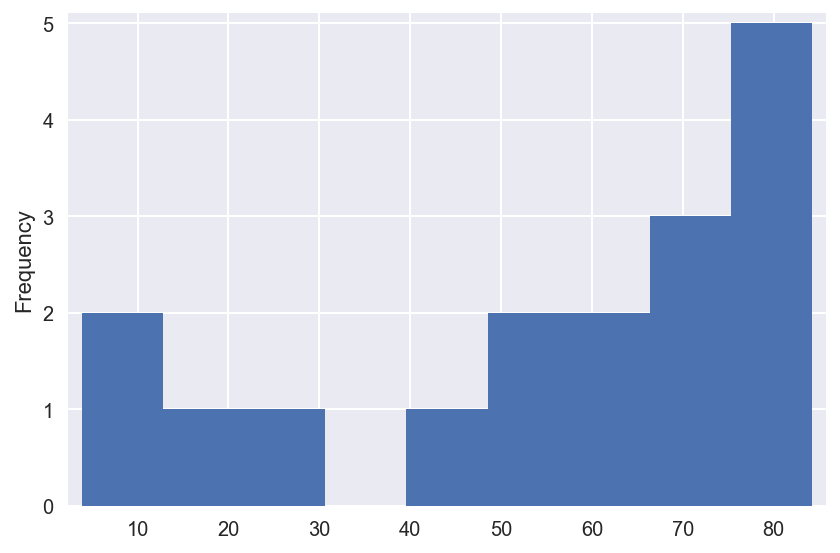

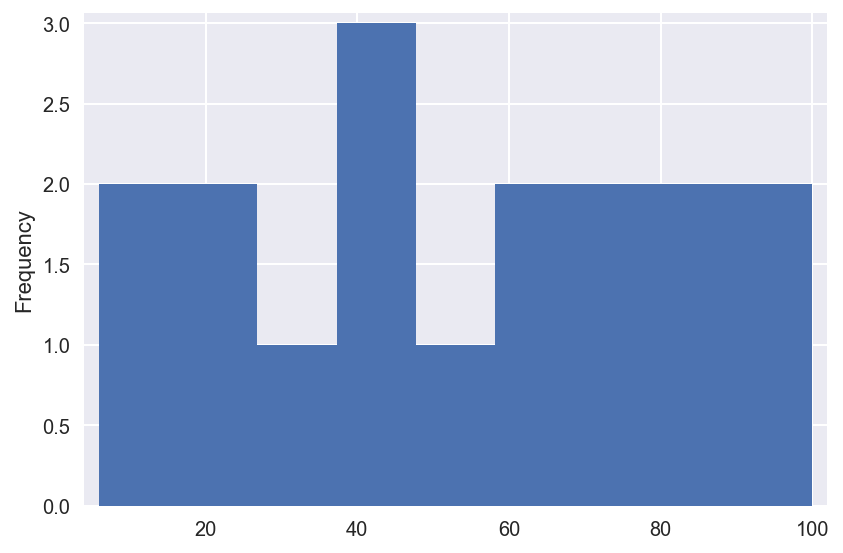

In [36]:
# With percentile scoring, we may ignore the effects of outliers entirely since the precise magnitudes of each observation's
# values are transformed into a ranked order. Thus, any variability and extremity in the data are ignored during the 
# computation of statistics.

# Plotting 'alcohol-use'
drugs['alcohol-use'].plot(kind='hist', bins=9); plt.tight_layout(); plt.margins(0.02); plt.show()

# Plotting 'alcohol-use' percentile scored
drugs['alcohol-use'].map(lambda x: stats.percentileofscore(drugs['alcohol-use'], x)).plot(kind='hist', bins=9)
plt.tight_layout(); plt.margins(0.02); plt.show()

In [37]:
# Converting to percentile scores, the graph becomes flatter.

# A histogram plot of the percentiles is the plotting of a monotonic transformed variable, then there will be an equal
# representation of each particular percentile value and thus the resultant shape should not only be flatter but also
# uniformly distributed.

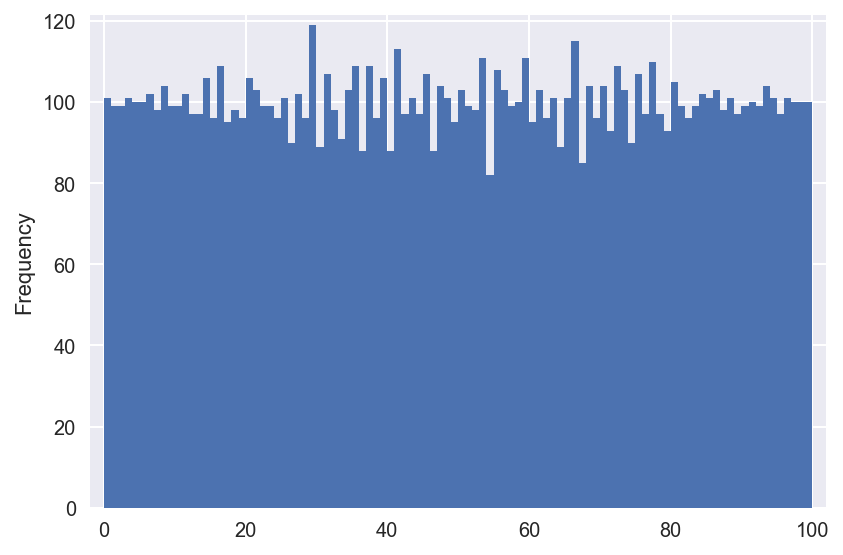

In [38]:
# Plotting 'bs_rate_mean' percentile scored
bs_rate_mean[0].map(lambda x: stats.percentileofscore(bs_rate_mean[0], x)).plot(kind='hist', bins=100)
plt.tight_layout(); plt.margins(0.02); plt.show()

In [39]:
# Using data from the bootstrap of the 'Rate' sample means, regardless of the underlying distribution, we see that as the
# sample points increase, the plot of the percentile looks increasingly uniform looking (which overcomes the binning bias
# problem).